# 🕳️ | Pre-procesamiento de los datos

## 📘 | Librerias

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")

## 🔧 | Utilitario

In [2]:
%run '../utils/functions.ipynb'

## 💾 | Cargar los datos

In [3]:
names = {
    'prueba_op_base_pivot_var_rpta_alt_enmascarado_oot.csv': 'df_base_pivot_oot',
    'prueba_op_base_pivot_var_rpta_alt_enmascarado_trtest.csv': 'df_base_pivot_trtest',
    'prueba_op_maestra_cuotas_pagos_mes_hist_enmascarado_completa.csv': 'df_cuotas_pagos_hist',
    'prueba_op_master_customer_data_enmascarado_completa.csv': 'df_master_customer_data',
    'prueba_op_probabilidad_oblig_base_hist_enmascarado_completa.csv': 'df_probabilidad_hist'
}

data_raw = '../data/raw/'

load_data_csv(names, data_raw)

DataFrame df_base_pivot_oot cargado con éxito. ✅
DataFrame df_probabilidad_hist cargado con éxito. ✅
DataFrame df_master_customer_data cargado con éxito. ✅
DataFrame df_base_pivot_trtest cargado con éxito. ✅
DataFrame sample_submission.csv no cargado, no se encuentra en el diccionario. 
DataFrame df_cuotas_pagos_hist cargado con éxito. ✅
Nombres de los DataFrames cargados: ['df_base_pivot_oot', 'df_probabilidad_hist', 'df_master_customer_data', 'df_base_pivot_trtest', 'df_cuotas_pagos_hist']


['df_base_pivot_oot',
 'df_probabilidad_hist',
 'df_master_customer_data',
 'df_base_pivot_trtest',
 'df_cuotas_pagos_hist']

## 🔬 | Examinar los datos

### Tamaño

In [4]:
dataframes_names = ['df_base_pivot_oot', 'df_probabilidad_hist', 'df_master_customer_data', 'df_base_pivot_trtest', 'df_cuotas_pagos_hist']
dataframes = [df_base_pivot_oot, df_probabilidad_hist, df_master_customer_data, df_base_pivot_trtest, df_cuotas_pagos_hist]
get_df_size(dataframes_names)

,name,rows,columns,size
0,df_cuotas_pagos_hist,4855035,13,63115455
1,df_probabilidad_hist,4804836,7,33633852
2,df_base_pivot_trtest,568251,49,27844299
3,df_master_customer_data,430000,37,15910000
4,df_base_pivot_oot,112549,4,450196


### Tipos de datos

In [5]:
get_df_dtypes(dataframes_names, dataframes)

,DataFrame,int64,float64,object,total
0,df_base_pivot_trtest,13,12.0,24.0,49.0
1,df_master_customer_data,7,10.0,20.0,37.0
2,df_cuotas_pagos_hist,3,5.0,5.0,13.0
3,df_probabilidad_hist,4,3.0,0.0,7.0
4,df_base_pivot_oot,4,0.0,0.0,4.0


### Columnas

In [6]:
get_df_columns(dataframes_names, dataframes)

,DataFrame,Column,Type
0,df_master_customer_data,act_econom,object
1,df_cuotas_pagos_hist,ajustes_banco,object
2,df_base_pivot_trtest,alter_posible1_2,object
3,df_base_pivot_trtest,alter_posible2_2,object
4,df_base_pivot_trtest,alter_posible3_2,object
...,...,...,...
105,df_cuotas_pagos_hist,valor_cuota_mes,float64
106,df_base_pivot_trtest,var_rpta_alt,int64
107,df_base_pivot_trtest,vlr_obligacion,float64
108,df_base_pivot_trtest,vlr_vencido,float64


## ♊️ | Valores duplicados

### Identificación

In [7]:
get_df_duplicates(dataframes_names, dataframes)

,DataFrame,total_duplicates,%_duplicates
0,df_base_pivot_oot,0,0.0
1,df_probabilidad_hist,0,0.0
2,df_master_customer_data,0,0.0
3,df_base_pivot_trtest,0,0.0
4,df_cuotas_pagos_hist,0,0.0


A parentemente no se encuentran valores duplicados, pero se sospecha que existen varias ingestas o fechas de corte para un mismo registro.

### Por ingestas

In [8]:
df_master_customer_data['fecha_ingesta'] = (df_master_customer_data['year'].astype(str) + '-' + df_master_customer_data['month'].astype(str) + '-' + df_master_customer_data['ingestion_day'].astype(str)).astype('datetime64[ns]')
df_master_customer_data['fecha_ingesta'] = pd.to_datetime(df_master_customer_data['fecha_ingesta'], format='%Y-%m-%d', errors='coerce')
df_master_customer_data.drop(['year', 'month', 'ingestion_day'], axis=1, inplace=True)
df_master_customer_data.sort_values(by=['nit_enmascarado', 'fecha_ingesta'], ascending=True, inplace=True)
df_master_customer_data.reset_index(drop=True, inplace=True)

df_master_customer_data.tail()

,nit_enmascarado,cod_tipo_doc,tipo_cli,ctrl_terc,genero_cli,ano_nac_cli,edad_cli,estado_civil,tipo_vivienda,num_hijos,...,segm,subsegm,nicho,region_of,nombre_dpto_dirp,egresos_mes,tot_patrimonio,ciiu,smmlv,fecha_ingesta
429995,634700,5,PERSONA NATURAL,CLIENTE,M,1972.0,51.0,CASADO,NaN,0.0,...,PLUS,BASICO,NaN,BOGOTA Y CUNDINAMARCA,BOGOTÁ,3600000.0,21748000.0,ASALARIADOS,1160000.0,2023-08-31
429996,634700,5,PERSONA NATURAL,CLIENTE,M,1972.0,51.0,CASADO,NaN,0.0,...,PLUS,BASICO,NaN,BOGOTA Y CUNDINAMARCA,BOGOTÁ,3600000.0,21748000.0,ASALARIADOS,1160000.0,2023-09-30
429997,634707,4,PERSONA NATURAL,CLIENTE,F,1983.0,39.0,SOLTERO,ALQUILADA,0.0,...,PERSONAL,MEDIO,MUJERES,ANTIOQUIA,ANTIOQUIA,500000.0,91000000.0,ASALARIADOS,1160000.0,2023-08-31
429998,634707,4,PERSONA NATURAL,CLIENTE,F,1983.0,40.0,SOLTERO,ALQUILADA,0.0,...,PERSONAL,MEDIO,MUJERES,ANTIOQUIA,ANTIOQUIA,500000.0,91000000.0,ASALARIADOS,1160000.0,2023-12-31
429999,634709,4,PERSONA NATURAL,CLIENTE,F,1999.0,24.0,SOLTERO,FAMILIAR,0.0,...,PERSONAL,MEDIO,MUJERES,BOGOTA Y CUNDINAMARCA,BOGOTÁ,0.0,973000.0,ASALARIADOS,1160000.0,2023-08-31


In [9]:
df_master_customer_data['fecha_ingesta'].unique()

<DatetimeArray>
['2023-07-31 00:00:00', '2023-09-30 00:00:00', '2023-10-31 00:00:00',
 '2023-12-31 00:00:00', '2023-11-30 00:00:00', '2023-08-31 00:00:00']
Length: 6, dtype: datetime64[ns]

Se tienen varias fechas de ingesta, es decir, puede que un mismo cliente este registrado en varias oportunidades. Se decide tomar la media de las variables numericas y el ultimo registro en el caso de las variables categoricas. Es factible que mes a mes un cliente no tenga cambios significativos en sus caracteristicas.

In [10]:
df_master_customer_data = df_master_customer_data.groupby(['nit_enmascarado']).agg({
    'cod_tipo_doc' : 'last',
    'tipo_cli' : 'last',
    'ctrl_terc' : 'last',
    'genero_cli' : 'last', 
    'ano_nac_cli' : 'mean', 
    'edad_cli' : 'mean', 
    'estado_civil' : 'last',
    'tipo_vivienda' : 'last', 
    'num_hijos' : 'mean', 
    'personas_dependientes' : 'mean',
    'nivel_academico' : 'last', 
    'ocup' : 'last', 
    'act_econom' : 'last', 
    'sector' : 'last', 
    'subsector' : 'last',
    'declarante' : 'last', 
    'total_ing' : 'mean', 
    'tot_activos' : 'mean', 
    'tot_pasivos' : 'mean',
    'origen_fondos' : 'last', 
    'f_vinc' : 'mean', 
    'f_ult_mantenimiento' : 'last', 
    'canal_actualizacion' : 'last',
    'cli_actualizado' : 'last', 
    'segm' : 'last', 
    'subsegm' : 'last', 
    'nicho' : 'last', 
    'region_of' : 'last',
    'nombre_dpto_dirp' : 'last', 
    'egresos_mes' : 'mean', 
    'tot_patrimonio' : 'mean', 
    'ciiu' : 'last', 
    'smmlv' : 'mean',
})
df_master_customer_data.reset_index(inplace=True)
df_master_customer_data.sort_values(by=['nit_enmascarado'], ascending=True, inplace=True)
df_master_customer_data.tail()

,nit_enmascarado,cod_tipo_doc,tipo_cli,ctrl_terc,genero_cli,ano_nac_cli,edad_cli,estado_civil,tipo_vivienda,num_hijos,...,cli_actualizado,segm,subsegm,nicho,region_of,nombre_dpto_dirp,egresos_mes,tot_patrimonio,ciiu,smmlv
241044,634694,5,PERSONA NATURAL,CLIENTE,F,1964.0,59.0,SOLTERO,None,0.0,...,N,PERSONAL,BASICO,MUJERES,BOGOTA Y CUNDINAMARCA,BOGOTÁ,100000.0,16212.5,None,1160000.0
241045,634695,5,PERSONA NATURAL,CLIENTE,M,1990.0,32.5,SOLTERO,None,0.0,...,N,PERSONAL,MEDIO,INDEPENDIENTE,ANTIOQUIA,ANTIOQUIA,600000.0,0.0,ACTIVIDADES DE ADMINISTRACIÓN EMPRESARIAL,1160000.0
241046,634700,5,PERSONA NATURAL,CLIENTE,M,1972.0,51.0,CASADO,None,0.0,...,S,PLUS,BASICO,None,BOGOTA Y CUNDINAMARCA,BOGOTÁ,3600000.0,21748000.0,ASALARIADOS,1160000.0
241047,634707,4,PERSONA NATURAL,CLIENTE,F,1983.0,39.5,SOLTERO,ALQUILADA,0.0,...,N,PERSONAL,MEDIO,MUJERES,ANTIOQUIA,ANTIOQUIA,500000.0,91000000.0,ASALARIADOS,1160000.0
241048,634709,4,PERSONA NATURAL,CLIENTE,F,1999.0,24.0,SOLTERO,FAMILIAR,0.0,...,N,PERSONAL,MEDIO,MUJERES,BOGOTA Y CUNDINAMARCA,BOGOTÁ,0.0,973000.0,ASALARIADOS,1160000.0


Se eliminan 188.952 y se queda con 241.049 registros. 

### Por fechas de corte

In [12]:
df_base_pivot_trtest.sort_values(by=['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_var_rpta_alt'], ascending=[True, True, True], inplace=True)
df_base_pivot_trtest.reset_index(drop=True, inplace=True)
df_base_pivot_trtest.head()

,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,tipo_var_rpta_alt,banca,segmento,producto,producto_cons,...,porc_pago_cuota,pago_mes,porc_pago_mes,pagos_tanque,marca_debito_mora,alternativa_aplicada_agr,marca_agrupada_rgo,marca_pago,marca_alternativa,marca_alternativa_orig
0,1,975854,104488,202308,1,a_uno_tipo_1,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,...,0.263589,26582.0,0.069234,Con pago,NO,COMBO,REESTRUCTURACIÓN,Pago parcial,Acepta Alternativa,Acepta Alternativa
1,2,389854,690004,202312,1,a_uno_tipo_1,Banca Personas,Personal plus,TARJETA DE CREDITO,Tarjeta de Credito,...,0.000000,0.0,0.000000,Sin pago,NO,AMPLIACION,MANTENIMIENTO,Cumple compromiso,Acepta Alternativa,Acepta Alternativa
2,5,458725,621619,202309,1,a_uno_tipo_1,Banca Personas,Personal,TARJETA DE CREDITO,Tarjeta de Credito,...,0.000000,0.0,0.000000,Sin pago,NO,AMPLIACION,MANTENIMIENTO,Cumple compromiso,Acepta Alternativa,Acepta Alternativa
3,12,623302,457040,202312,1,a_uno_tipo_1,Independientes,Micropyme,CARTERA ORDINARIA,Cartera Ordinaria,...,0.000000,0.0,0.000000,Sin pago,NO,COMBO,MODIFICACIÓN,Cumple compromiso,Acepta Alternativa,Acepta Alternativa
4,14,209309,873421,202308,0,e_cero_tipo_2,Banca Personas,Personal plus,TARJETA DE CREDITO,Tarjeta de Credito,...,0.000000,0.0,NaN,Sin pago,NO,NaN,NaN,Sin pago,N.A,N.A


In [13]:
df_base_pivot_trtest['fecha_var_rpta_alt'].unique()

array([202308, 202312, 202309, 202310, 202311])

In [14]:
df_cuotas_pagos_hist['fecha_corte_1'] = df_cuotas_pagos_hist['fecha_corte'].astype(str).str[:6]

meses_interes = ['202308', '202309', '202310', '202311', '202312']

df_cuotas_pagos_hist = df_cuotas_pagos_hist[df_cuotas_pagos_hist['fecha_corte_1'].isin(meses_interes)].copy()

df_cuotas_pagos_hist.drop(['fecha_corte'], axis=1, inplace=True)
df_cuotas_pagos_hist.rename(columns={'fecha_corte_1': 'fecha_corte'}, inplace=True)
df_cuotas_pagos_hist['fecha_corte'] = df_cuotas_pagos_hist['fecha_corte'].astype(int)
df_cuotas_pagos_hist.sort_values(by=['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_corte'], ascending=[True, True, True], inplace=True)
df_cuotas_pagos_hist.reset_index(drop=True, inplace=True)
df_cuotas_pagos_hist.tail()

,nit_enmascarado,num_oblig_enmascarado,producto,aplicativo,segmento,valor_cuota_mes,pago_total,fecha_pago_minima,fecha_pago_maxima,porc_pago,marca_pago,ajustes_banco,fecha_corte
2129355,634709,780082,TARJETA DE CREDITO,V,PERSONAL,683385.0,0.0,NaN,NaN,0.0,IGUAL,NO,202308
2129356,634709,780082,TARJETA DE CREDITO,V,PERSONAL,1031724.0,1052294.0,20230819.0,20230819.0,102.0,PAGO_MAS,NO,202309
2129357,634709,780082,TARJETA DE CREDITO,V,PERSONAL,395528.0,0.0,NaN,NaN,0.0,NO_PAGO,NO,202310
2129358,634709,780082,TARJETA DE CREDITO,V,PERSONAL,401399.0,0.0,NaN,NaN,0.0,CANCELADO,NO,202311
2129359,634709,780082,TARJETA DE CREDITO,V,PERSONAL,413620.0,437629.0,20231204.0,20231204.0,106.0,FACTURACION_MES_SGTE,NO,202312


Se eliminan 2.725.676 y se queda con 2.129.359 registros.

In [15]:
df_cuotas_pagos_hist['fecha_corte'].unique()

array([202308, 202309, 202310, 202311, 202312])

In [18]:
df_probabilidad_hist['fecha_corte_1'] = df_probabilidad_hist['fecha_corte'].astype(str).str[:6]

meses_interes = ['202308', '202309', '202310', '202311', '202312']

df_probabilidad_hist = df_probabilidad_hist[df_probabilidad_hist['fecha_corte_1'].isin(meses_interes)].copy()

df_probabilidad_hist.drop(['fecha_corte'], axis=1, inplace=True)
df_probabilidad_hist.rename(columns={'fecha_corte_1': 'fecha_corte'}, inplace=True)
df_probabilidad_hist['fecha_corte'] = df_probabilidad_hist['fecha_corte'].astype(int)
df_probabilidad_hist.sort_values(by=['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_corte'], ascending=[True, True, True], inplace=True)
df_probabilidad_hist.reset_index(drop=True, inplace=True)
df_probabilidad_hist

df_probabilidad_hist.tail()

,nit_enmascarado,num_oblig_enmascarado,lote,prob_propension,prob_alrt_temprana,prob_auto_cura,fecha_corte
2102760,634709,780082,2,0.665648,0.561553,0.283733,202308
2102761,634709,780082,3,0.675782,0.549182,0.283760,202309
2102762,634709,780082,3,0.668956,0.566111,0.239386,202310
2102763,634709,780082,3,0.427463,0.585852,0.203494,202311
2102764,634709,780082,3,0.412733,0.570871,0.285301,202312


Se eliminan 2702071 y se queda con 2.102.765 registros.

In [19]:
df_probabilidad_hist['fecha_corte'].unique()

array([202308, 202309, 202310, 202311, 202312])

## 🤝🏻 | Unir dataframes

Se decide unir los dataframes, para contruir una gran sabana de datos y poder tener una visón más amplia de las variables que pueden ayudar a predecir la variable objetivo.

In [21]:
cols_mcd = []
for col in df_master_customer_data.columns:
    if col not in df_base_pivot_trtest.columns:
        cols_mcd.append(col)
        print(f"Columna '{col}' no encontrada en df_base_pivot_trtest")
print(f"Total de columnas en df_master_customer_data que no están en df_base_pivot_trtest: {len(cols_mcd)}")

Columna 'cod_tipo_doc' no encontrada en df_base_pivot_trtest
Columna 'tipo_cli' no encontrada en df_base_pivot_trtest
Columna 'ctrl_terc' no encontrada en df_base_pivot_trtest
Columna 'genero_cli' no encontrada en df_base_pivot_trtest
Columna 'ano_nac_cli' no encontrada en df_base_pivot_trtest
Columna 'edad_cli' no encontrada en df_base_pivot_trtest
Columna 'estado_civil' no encontrada en df_base_pivot_trtest
Columna 'tipo_vivienda' no encontrada en df_base_pivot_trtest
Columna 'num_hijos' no encontrada en df_base_pivot_trtest
Columna 'personas_dependientes' no encontrada en df_base_pivot_trtest
Columna 'nivel_academico' no encontrada en df_base_pivot_trtest
Columna 'ocup' no encontrada en df_base_pivot_trtest
Columna 'act_econom' no encontrada en df_base_pivot_trtest
Columna 'sector' no encontrada en df_base_pivot_trtest
Columna 'subsector' no encontrada en df_base_pivot_trtest
Columna 'declarante' no encontrada en df_base_pivot_trtest
Columna 'total_ing' no encontrada en df_base_pivo

In [22]:
df_trtest = df_base_pivot_trtest.copy()
df_mcd = df_master_customer_data.copy()
df_trtest_mcd = pd.merge(
    df_trtest,
    df_mcd[['nit_enmascarado'] + cols_mcd],
    how='left',
    on='nit_enmascarado'
)
df_trtest_mcd.sort_values(by=['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_var_rpta_alt'], ascending=[True, True, True], inplace=True)
df_trtest_mcd.reset_index(drop=True, inplace=True)
df_trtest_mcd.head()

,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,tipo_var_rpta_alt,banca,segmento,producto,producto_cons,...,cli_actualizado,segm,subsegm,nicho,region_of,nombre_dpto_dirp,egresos_mes,tot_patrimonio,ciiu,smmlv
0,1,975854,104488,202308,1,a_uno_tipo_1,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,...,N,PERSONAL,MEDIO,None,BOGOTA Y CUNDINAMARCA,BOGOTÁ,1000000.0,7776000.0,ASALARIADOS,1160000.0
1,2,389854,690004,202312,1,a_uno_tipo_1,Banca Personas,Personal plus,TARJETA DE CREDITO,Tarjeta de Credito,...,N,PLUS,BASICO,MUJERES,SUR,VALLE,0.0,55447000.0,ASALARIADOS,1160000.0
2,5,458725,621619,202309,1,a_uno_tipo_1,Banca Personas,Personal,TARJETA DE CREDITO,Tarjeta de Credito,...,N,PERSONAL,MEDIO,MUJERES,BOGOTA Y CUNDINAMARCA,BOGOT,150000.0,25550000.0,ASALARIADOS,1160000.0
3,12,623302,457040,202312,1,a_uno_tipo_1,Independientes,Micropyme,CARTERA ORDINARIA,Cartera Ordinaria,...,S,INDEPENDIENTES,GRANDE,None,BOGOTA Y CUNDINAMARCA,CUNDINAMARCA,7000000.0,460000000.0,CRÍA DE GANADO BOVINO Y BUFALINO,1160000.0
4,14,209309,873421,202308,0,e_cero_tipo_2,Banca Personas,Personal plus,TARJETA DE CREDITO,Tarjeta de Credito,...,S,PLUS,BASICO,None,CARIBE,CÓRDOBA,700000.0,92971000.0,ASALARIADOS,1160000.0


In [23]:
cols_cph = []
for col in df_cuotas_pagos_hist.columns:
    if col not in df_trtest_mcd.columns:
        cols_cph.append(col)
        print(f"Columna '{col}' no encontrada en df_trtest_mcd")
print(f"Total de columnas en df_cuotas_pagos_hist que no están en df_trtest_mcd: {len(cols_cph)}")

Columna 'pago_total' no encontrada en df_trtest_mcd
Columna 'fecha_pago_minima' no encontrada en df_trtest_mcd
Columna 'fecha_pago_maxima' no encontrada en df_trtest_mcd
Columna 'porc_pago' no encontrada en df_trtest_mcd
Columna 'ajustes_banco' no encontrada en df_trtest_mcd
Columna 'fecha_corte' no encontrada en df_trtest_mcd
Total de columnas en df_cuotas_pagos_hist que no están en df_trtest_mcd: 6


In [24]:
df_cph = df_cuotas_pagos_hist.copy()
df_trtest_mcd_cph = pd.merge(
    df_trtest_mcd, 
    df_cph[['nit_enmascarado', 'num_oblig_enmascarado'] + cols_cph], 
    how='left', 
    left_on=['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_var_rpta_alt'], 
    right_on=['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_corte']
    )
df_trtest_mcd_cph.sort_values(
    ['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_var_rpta_alt'], 
    inplace=True
    )
df_trtest_mcd_cph.drop_duplicates(
    ['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_var_rpta_alt', 'num_oblig_orig_enmascarado'],
    keep='last',
    inplace=True
    )
df_trtest_mcd_cph.reset_index(drop=True, inplace=True)
df_trtest_mcd_cph.head()

,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,tipo_var_rpta_alt,banca,segmento,producto,producto_cons,...,egresos_mes,tot_patrimonio,ciiu,smmlv,pago_total,fecha_pago_minima,fecha_pago_maxima,porc_pago,ajustes_banco,fecha_corte
0,1,975854,104488,202308,1,a_uno_tipo_1,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,...,1000000.0,7776000.0,ASALARIADOS,1160000.0,101204.0,20230706.0,20230801.0,26.0,NO,202308.0
1,2,389854,690004,202312,1,a_uno_tipo_1,Banca Personas,Personal plus,TARJETA DE CREDITO,Tarjeta de Credito,...,0.0,55447000.0,ASALARIADOS,1160000.0,0.0,20231204.0,20231204.0,0.0,NO,202312.0
2,5,458725,621619,202309,1,a_uno_tipo_1,Banca Personas,Personal,TARJETA DE CREDITO,Tarjeta de Credito,...,150000.0,25550000.0,ASALARIADOS,1160000.0,0.0,NaN,NaN,0.0,NO,202309.0
3,12,623302,457040,202312,1,a_uno_tipo_1,Independientes,Micropyme,CARTERA ORDINARIA,Cartera Ordinaria,...,7000000.0,460000000.0,CRÍA DE GANADO BOVINO Y BUFALINO,1160000.0,0.0,NaN,NaN,0.0,NO,202312.0
4,14,209309,873421,202308,0,e_cero_tipo_2,Banca Personas,Personal plus,TARJETA DE CREDITO,Tarjeta de Credito,...,700000.0,92971000.0,ASALARIADOS,1160000.0,0.0,NaN,NaN,0.0,NO,202308.0


In [25]:
cols_ph = []
for col in df_probabilidad_hist.columns:
    if col not in df_trtest_mcd_cph.columns:
        cols_ph.append(col)
        print(f"Columna '{col}' no encontrada en df_trtest_mcd_cph")
print(f"Total de columnas en df_probabilidad_hist que no están en df_trtest_mcd_cph: {len(cols_ph)}")

Columna 'lote' no encontrada en df_trtest_mcd_cph
Columna 'prob_propension' no encontrada en df_trtest_mcd_cph
Columna 'prob_alrt_temprana' no encontrada en df_trtest_mcd_cph
Columna 'prob_auto_cura' no encontrada en df_trtest_mcd_cph
Total de columnas en df_probabilidad_hist que no están en df_trtest_mcd_cph: 4


In [26]:
df_ph = df_probabilidad_hist.copy()
df_trtest_mcd_cph_ph = pd.merge(
    df_trtest_mcd_cph, 
    df_ph[['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_corte'] + cols_ph], 
    how='left', 
    left_on=['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_var_rpta_alt'], 
    right_on=['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_corte']
    )
df_trtest_mcd_cph_ph.sort_values(
    ['nit_enmascarado', 'num_oblig_enmascarado', 'fecha_var_rpta_alt'],
    inplace=True
    )
df_trtest_mcd_cph_ph.reset_index(drop=True, inplace=True)
df_trtest_mcd_cph_ph.head()

,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,tipo_var_rpta_alt,banca,segmento,producto,producto_cons,...,fecha_pago_minima,fecha_pago_maxima,porc_pago,ajustes_banco,fecha_corte_x,fecha_corte_y,lote,prob_propension,prob_alrt_temprana,prob_auto_cura
0,1,975854,104488,202308,1,a_uno_tipo_1,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,...,20230706.0,20230801.0,26.0,NO,202308.0,202308.0,2.0,0.402569,0.682365,0.185597
1,2,389854,690004,202312,1,a_uno_tipo_1,Banca Personas,Personal plus,TARJETA DE CREDITO,Tarjeta de Credito,...,20231204.0,20231204.0,0.0,NO,202312.0,202312.0,1.0,0.802099,0.565417,0.565900
2,5,458725,621619,202309,1,a_uno_tipo_1,Banca Personas,Personal,TARJETA DE CREDITO,Tarjeta de Credito,...,NaN,NaN,0.0,NO,202309.0,202309.0,2.0,0.488764,0.591143,0.163533
3,12,623302,457040,202312,1,a_uno_tipo_1,Independientes,Micropyme,CARTERA ORDINARIA,Cartera Ordinaria,...,NaN,NaN,0.0,NO,202312.0,202312.0,1.0,0.421872,0.709632,0.144849
4,14,209309,873421,202308,0,e_cero_tipo_2,Banca Personas,Personal plus,TARJETA DE CREDITO,Tarjeta de Credito,...,NaN,NaN,0.0,NO,202308.0,202308.0,1.0,0.829707,0.380765,0.562592


## 📍 | Outliers

Los outliers son valores atípicos que se encuentran significativamente alejados de la mayoría de los datos en un conjunto. Son importantes identificarlos, así como tratarlos, para garantizar la calidad de los datos, evitar sesgos en los análisis y mejorar la precisión de los modelos predictivos.

### Identificación

🔎 Detección de variables numéricas con outliers (IQR)
📌 Variable: 'vlr_obligacion'
----------------------------------------
Total de datos: 567585
Outliers detectados: 64796
Porcentaje de outliers: 11.42%
Rango IQR: Q1 = 1575662.00, Q3 = 10828198.00, IQR = 9252536.00
Valores extremos: min = 0.0, max = 1589994069.0



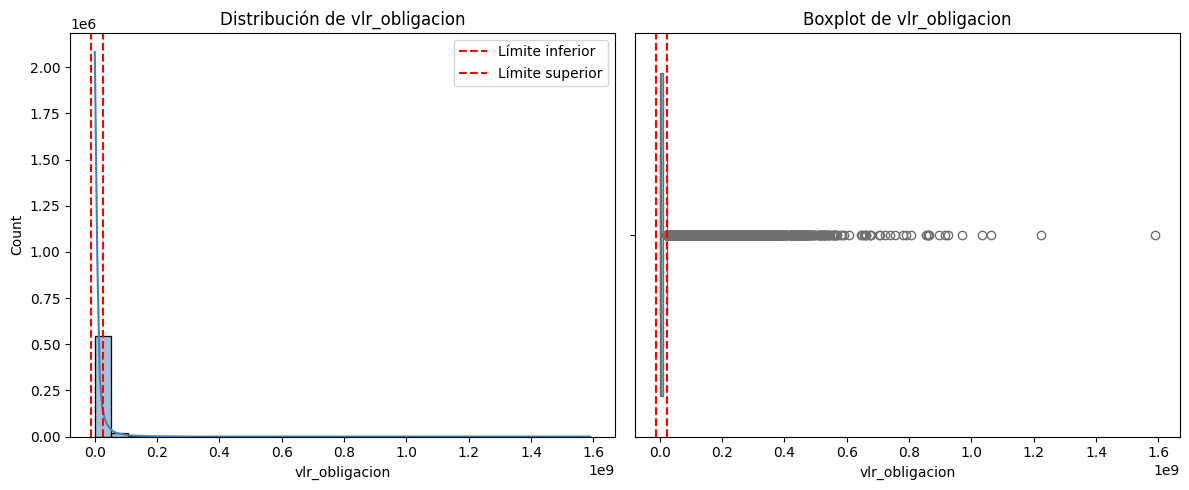


📌 Variable: 'vlr_vencido'
----------------------------------------
Total de datos: 568251
Outliers detectados: 56223
Porcentaje de outliers: 9.89%
Rango IQR: Q1 = 190059.00, Q3 = 1032518.00, IQR = 842459.00
Valores extremos: min = 0.0, max = 502351895.0



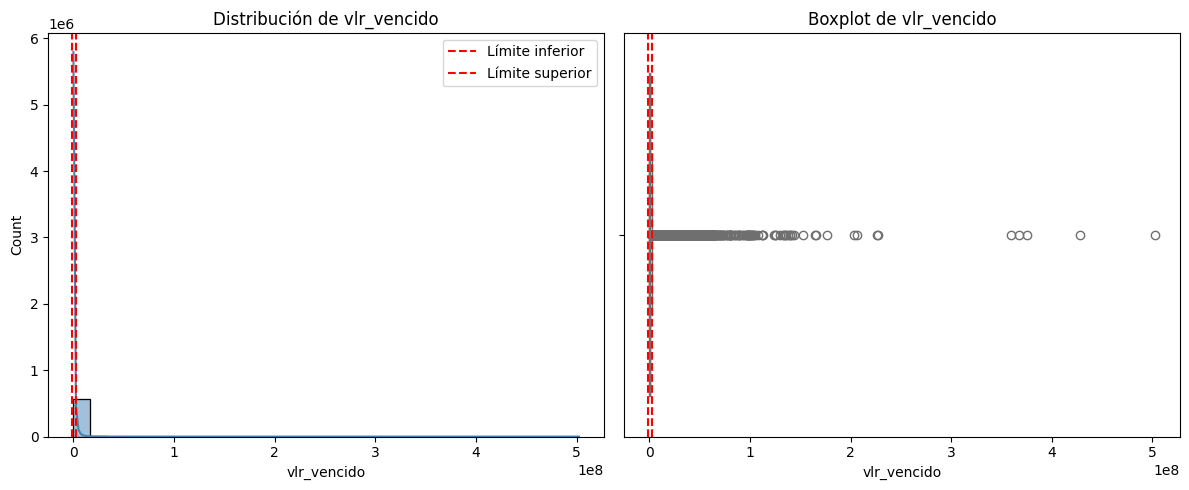


📌 Variable: 'saldo_capital'
----------------------------------------
Total de datos: 568251
Outliers detectados: 65647
Porcentaje de outliers: 11.55%
Rango IQR: Q1 = 1415149.16, Q3 = 9890030.00, IQR = 8474880.85
Valores extremos: min = 0.0, max = 1552837819.0



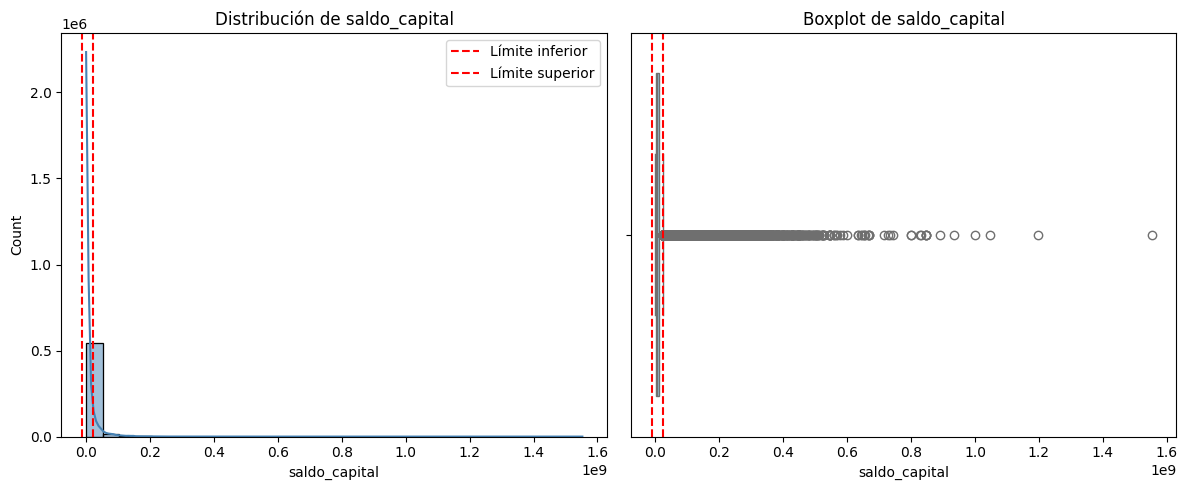


📌 Variable: 'endeudamiento'
----------------------------------------
Total de datos: 568251
Outliers detectados: 49916
Porcentaje de outliers: 8.78%
Rango IQR: Q1 = 5103892.00, Q3 = 42259769.00, IQR = 37155877.00
Valores extremos: min = 6.0, max = 1879459600.0



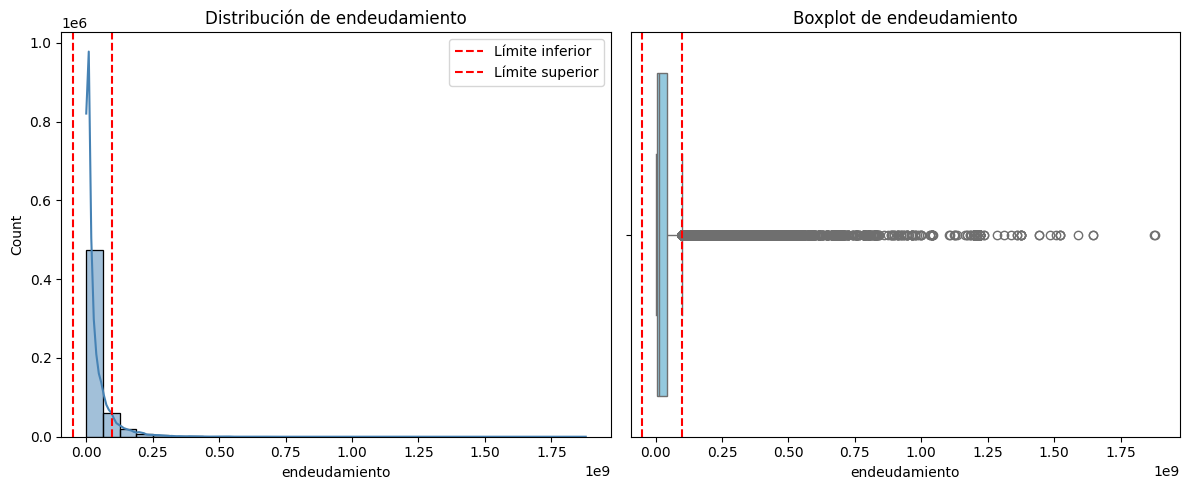


📌 Variable: 'cant_gestiones'
----------------------------------------
Total de datos: 549702
Outliers detectados: 23686
Porcentaje de outliers: 4.31%
Rango IQR: Q1 = 14.00, Q3 = 44.00, IQR = 30.00
Valores extremos: min = 2.0, max = 1030.0



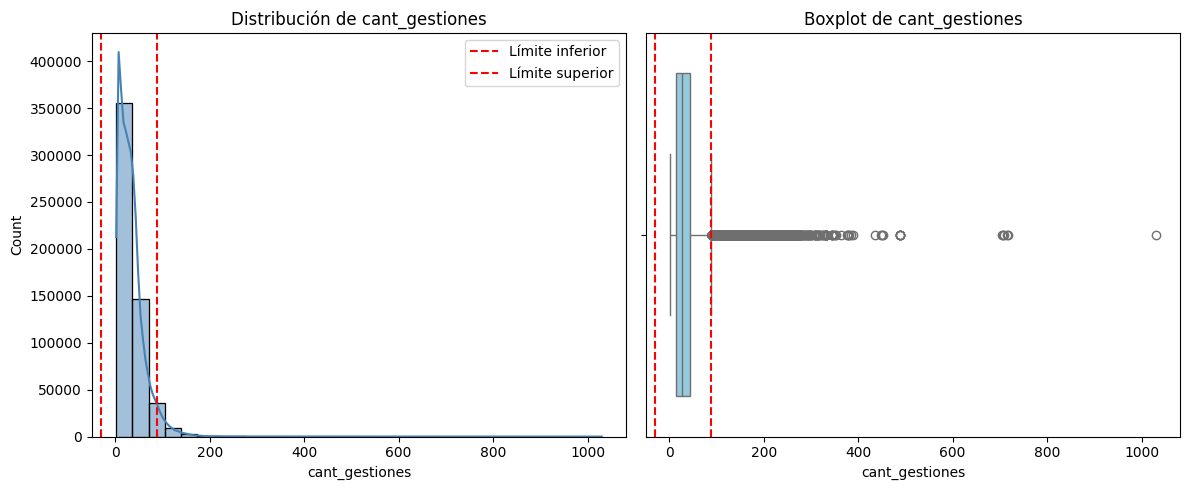


📌 Variable: 'cant_gestiones_binario'
----------------------------------------
Total de datos: 568251
Outliers detectados: 18549
Porcentaje de outliers: 3.26%
Rango IQR: Q1 = 1.00, Q3 = 1.00, IQR = 0.00
Valores extremos: min = 0, max = 1



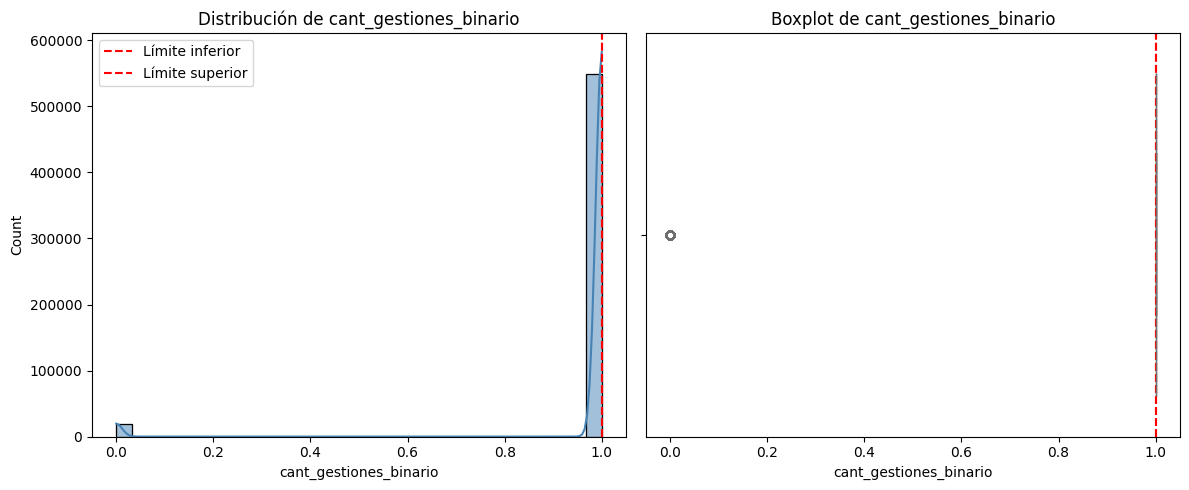


📌 Variable: 'rpc'
----------------------------------------
Total de datos: 568249
Outliers detectados: 37934
Porcentaje de outliers: 6.68%
Rango IQR: Q1 = 1.00, Q3 = 1.00, IQR = 0.00
Valores extremos: min = 0.0, max = 1.0



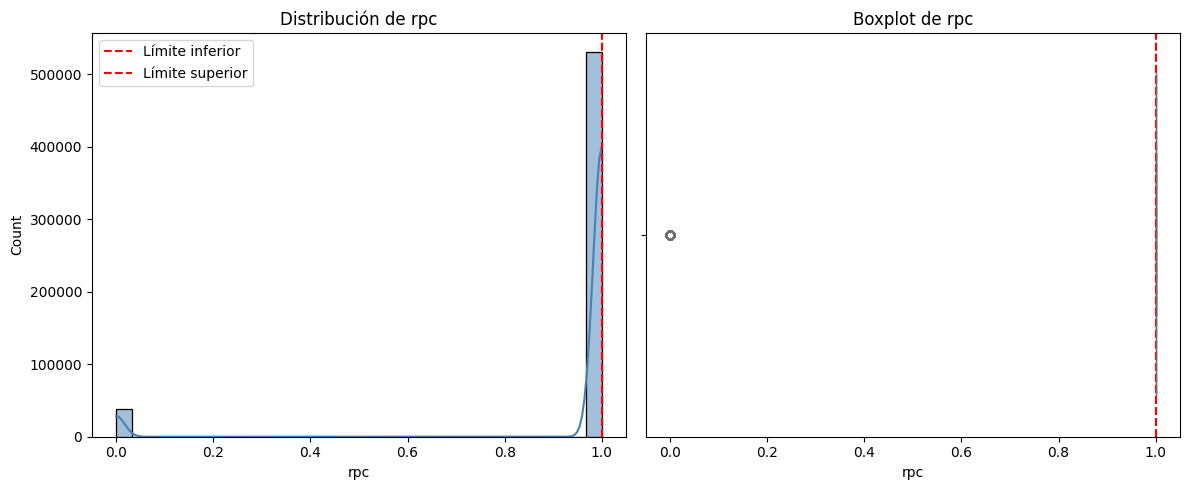


📌 Variable: 'promesas_cumplidas'
----------------------------------------
Total de datos: 568251
Outliers detectados: 54392
Porcentaje de outliers: 9.57%
Rango IQR: Q1 = 0.00, Q3 = 0.00, IQR = 0.00
Valores extremos: min = 0, max = 16



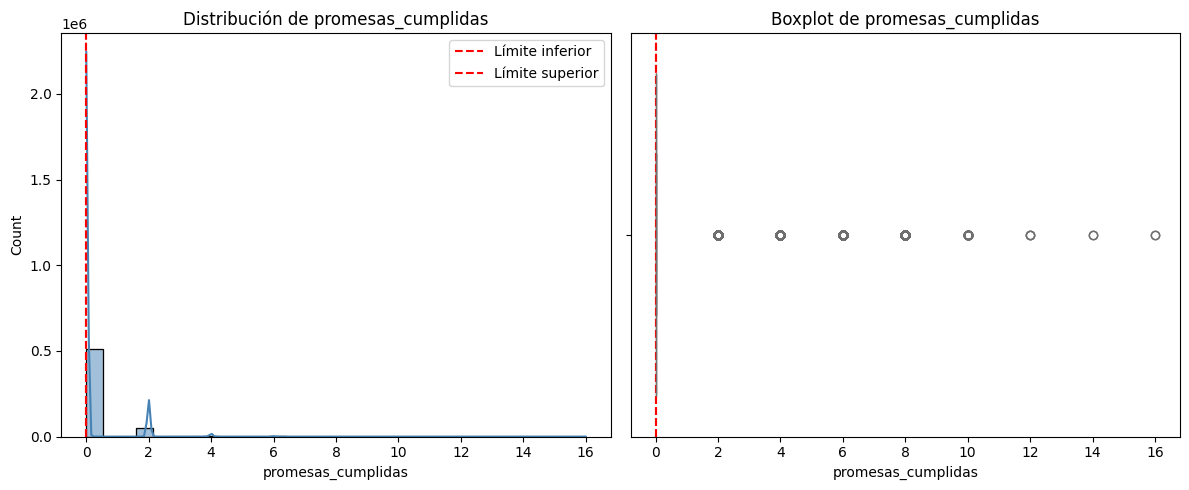


📌 Variable: 'cant_promesas_cumplidas_binario'
----------------------------------------
Total de datos: 568251
Outliers detectados: 54392
Porcentaje de outliers: 9.57%
Rango IQR: Q1 = 0.00, Q3 = 0.00, IQR = 0.00
Valores extremos: min = 0, max = 1



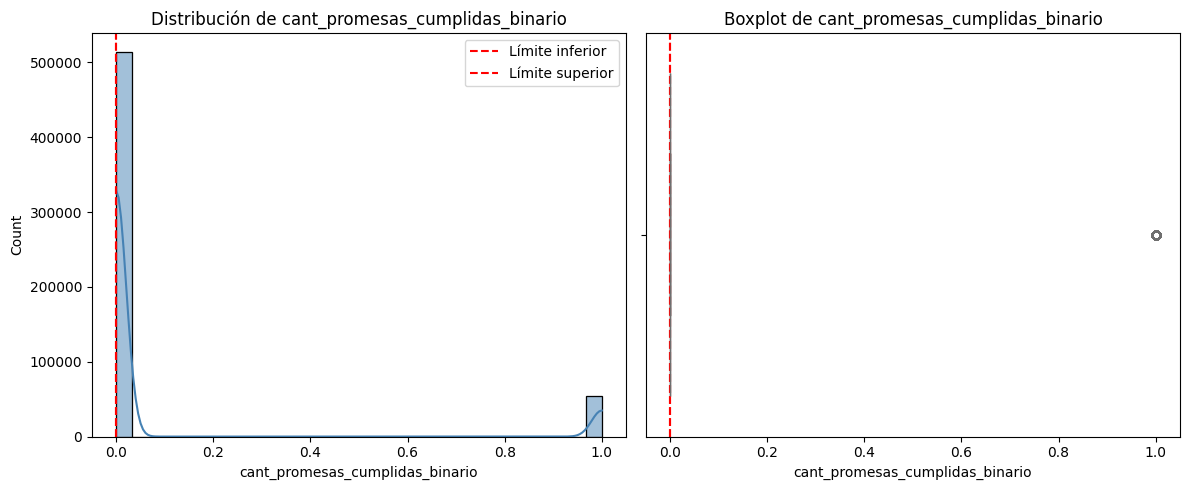


📌 Variable: 'cant_acuerdo'
----------------------------------------
Total de datos: 549621
Outliers detectados: 27504
Porcentaje de outliers: 5.00%
Rango IQR: Q1 = 0.00, Q3 = 2.00, IQR = 2.00
Valores extremos: min = 0.0, max = 56.0



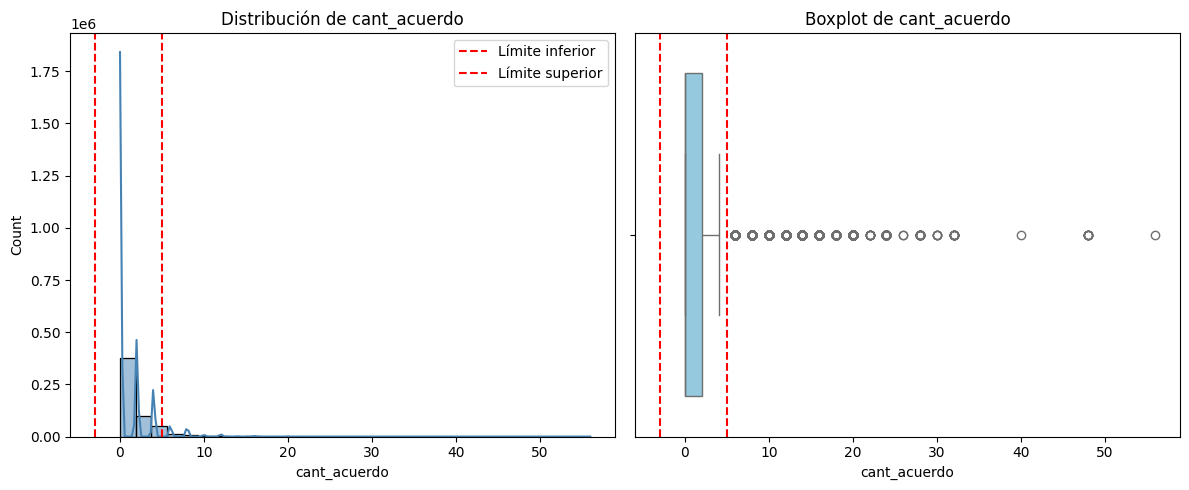


📌 Variable: 'valor_cuota_mes'
----------------------------------------
Total de datos: 568248
Outliers detectados: 53821
Porcentaje de outliers: 9.47%
Rango IQR: Q1 = 183380.75, Q3 = 1028784.57, IQR = 845403.82
Valores extremos: min = 0.0, max = 502351894.8



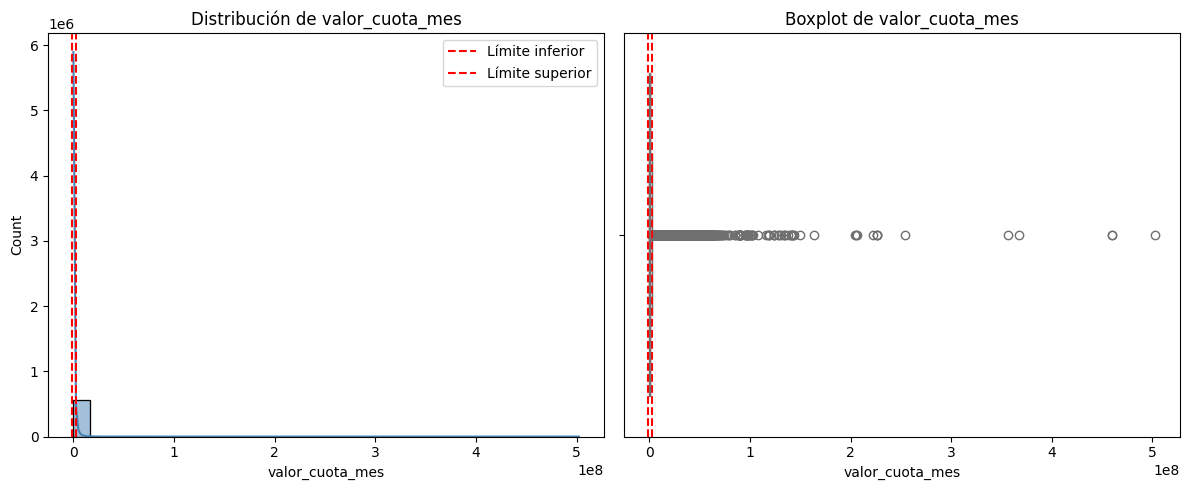


📌 Variable: 'pago_cuota'
----------------------------------------
Total de datos: 568248
Outliers detectados: 115618
Porcentaje de outliers: 20.35%
Rango IQR: Q1 = 0.00, Q3 = 85876.82, IQR = 85876.82
Valores extremos: min = 0.0, max = 2415000000.0



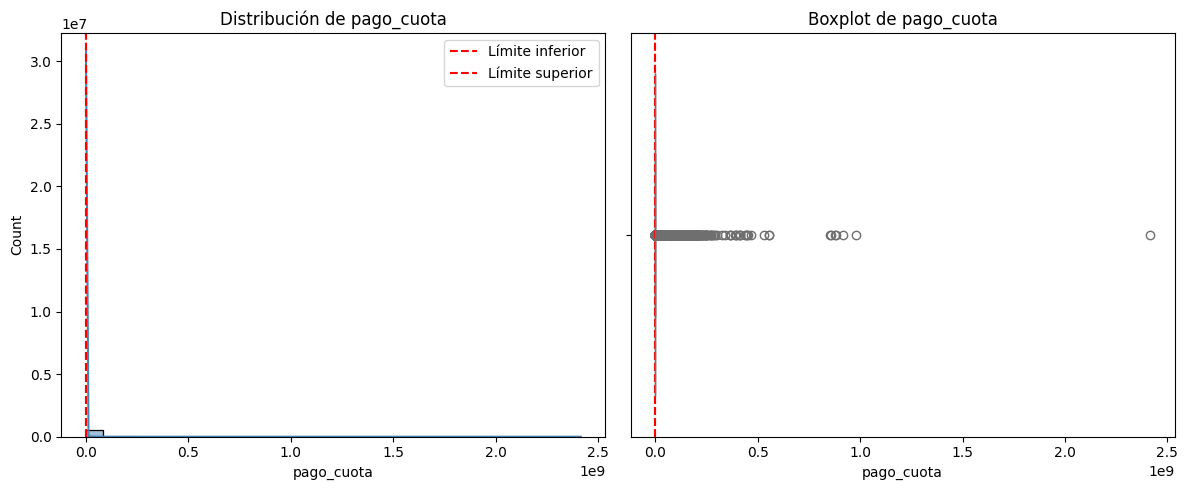


📌 Variable: 'porc_pago_cuota'
----------------------------------------
Total de datos: 568251
Outliers detectados: 119372
Porcentaje de outliers: 21.01%
Rango IQR: Q1 = 0.00, Q3 = 0.32, IQR = 0.32
Valores extremos: min = 0.0, max = 1.0



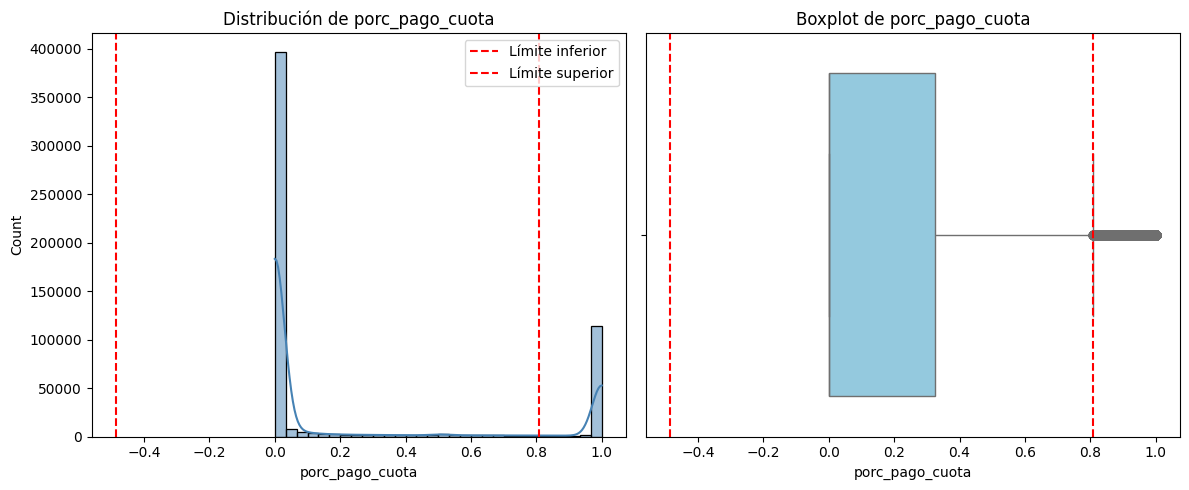


📌 Variable: 'pago_mes'
----------------------------------------
Total de datos: 568251
Outliers detectados: 123463
Porcentaje de outliers: 21.73%
Rango IQR: Q1 = 0.00, Q3 = 0.00, IQR = 0.00
Valores extremos: min = 0.0, max = 345000000.0



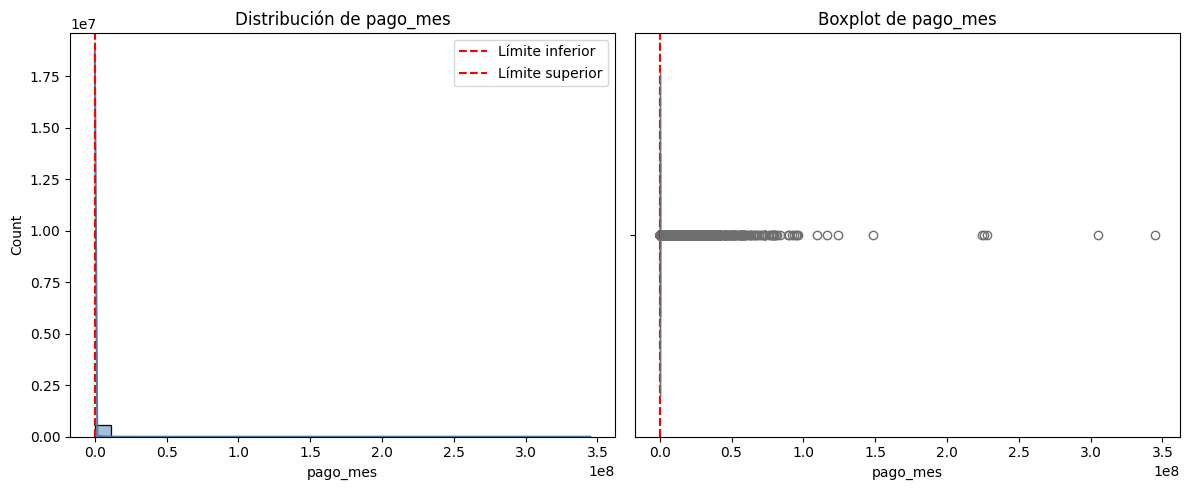


📌 Variable: 'porc_pago_mes'
----------------------------------------
Total de datos: 260137
Outliers detectados: 45261
Porcentaje de outliers: 17.40%
Rango IQR: Q1 = 0.00, Q3 = 0.24, IQR = 0.24
Valores extremos: min = 0.0, max = 1.0



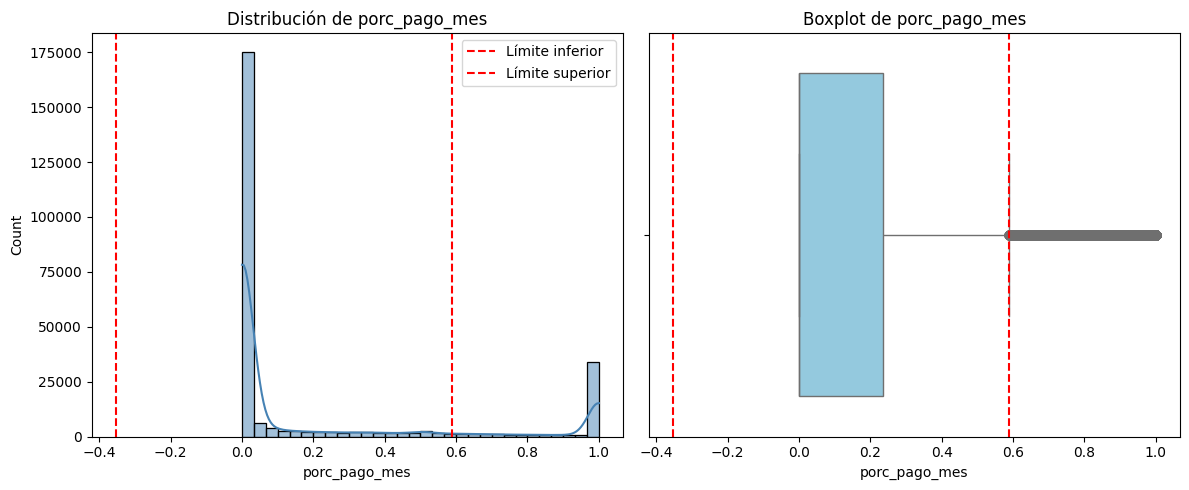


📌 Variable: 'cod_tipo_doc'
----------------------------------------
Total de datos: 456290
Outliers detectados: 13846
Porcentaje de outliers: 3.03%
Rango IQR: Q1 = 1.00, Q3 = 1.00, IQR = 0.00
Valores extremos: min = 1.0, max = 5.0



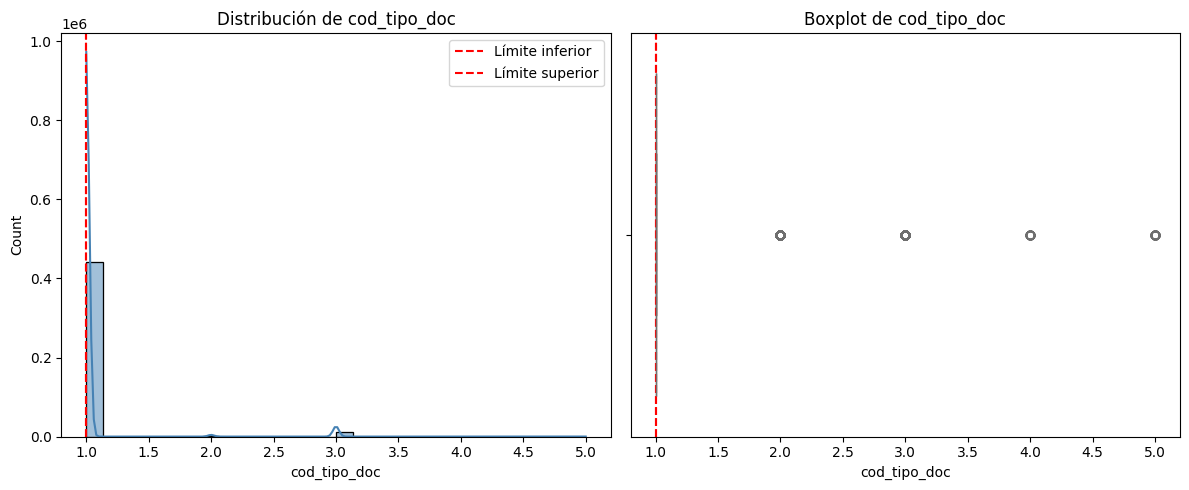


📌 Variable: 'ano_nac_cli'
----------------------------------------
Total de datos: 444503
Outliers detectados: 6702
Porcentaje de outliers: 1.51%
Rango IQR: Q1 = 1974.00, Q3 = 1992.00, IQR = 18.00
Valores extremos: min = 1899.0, max = 2023.0



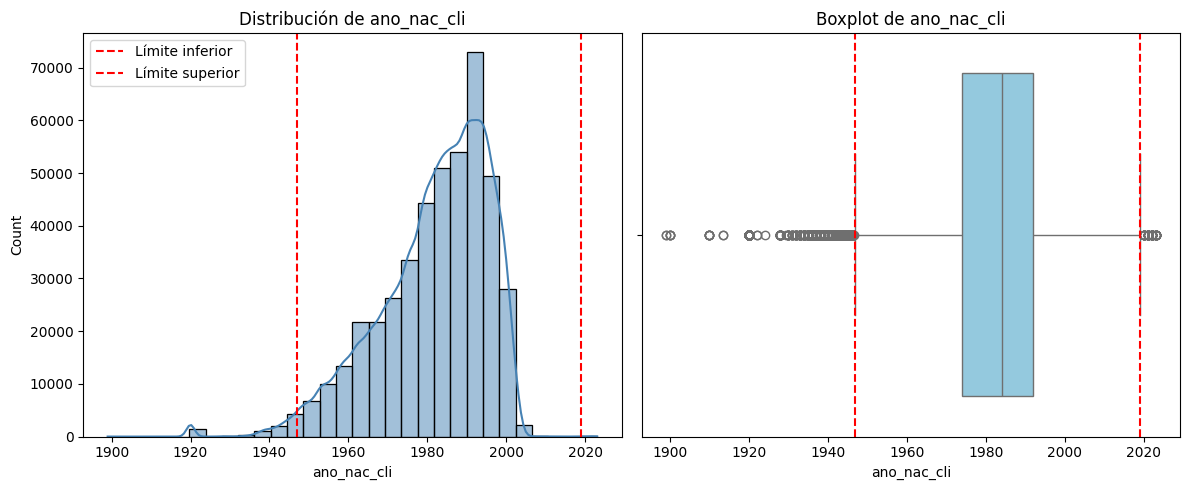


📌 Variable: 'edad_cli'
----------------------------------------
Total de datos: 444503
Outliers detectados: 5698
Porcentaje de outliers: 1.28%
Rango IQR: Q1 = 30.33, Q3 = 49.00, IQR = 18.67
Valores extremos: min = 0.0, max = 123.0



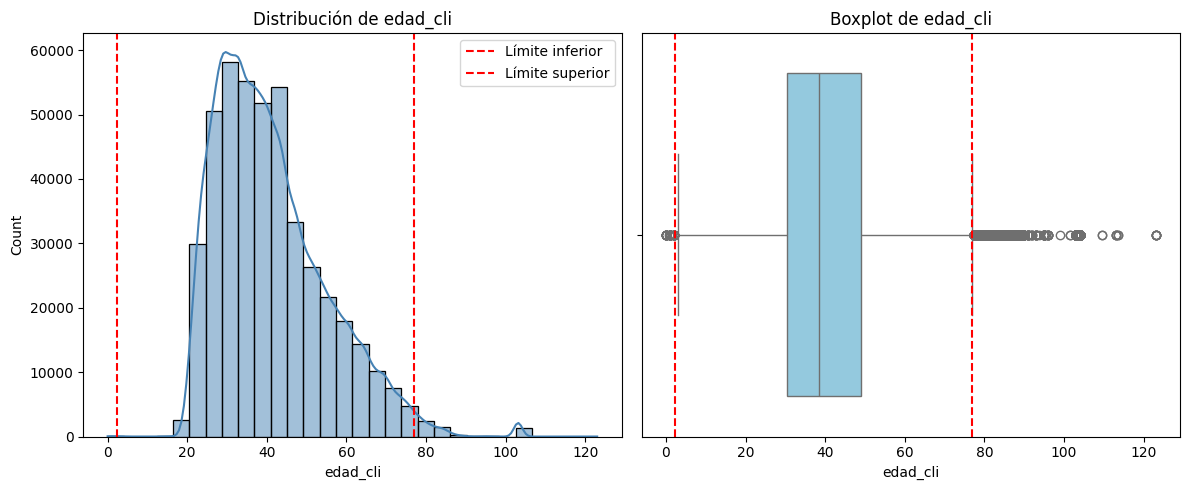


📌 Variable: 'num_hijos'
----------------------------------------
Total de datos: 444503
Outliers detectados: 56876
Porcentaje de outliers: 12.80%
Rango IQR: Q1 = 0.00, Q3 = 0.00, IQR = 0.00
Valores extremos: min = 0.0, max = 96.0



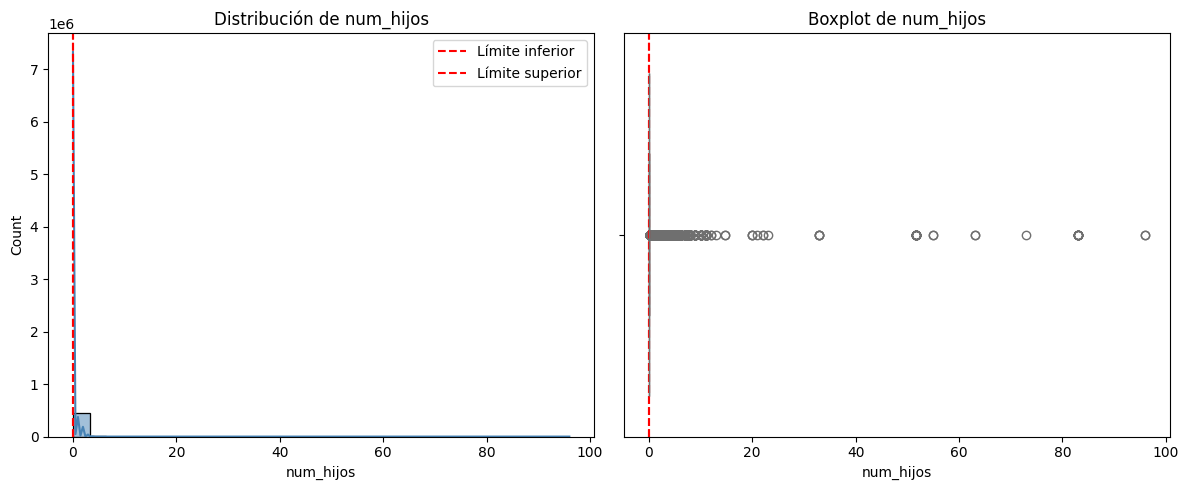


📌 Variable: 'personas_dependientes'
----------------------------------------
Total de datos: 444502
Outliers detectados: 62914
Porcentaje de outliers: 14.15%
Rango IQR: Q1 = 0.00, Q3 = 0.00, IQR = 0.00
Valores extremos: min = 0.0, max = 91.0



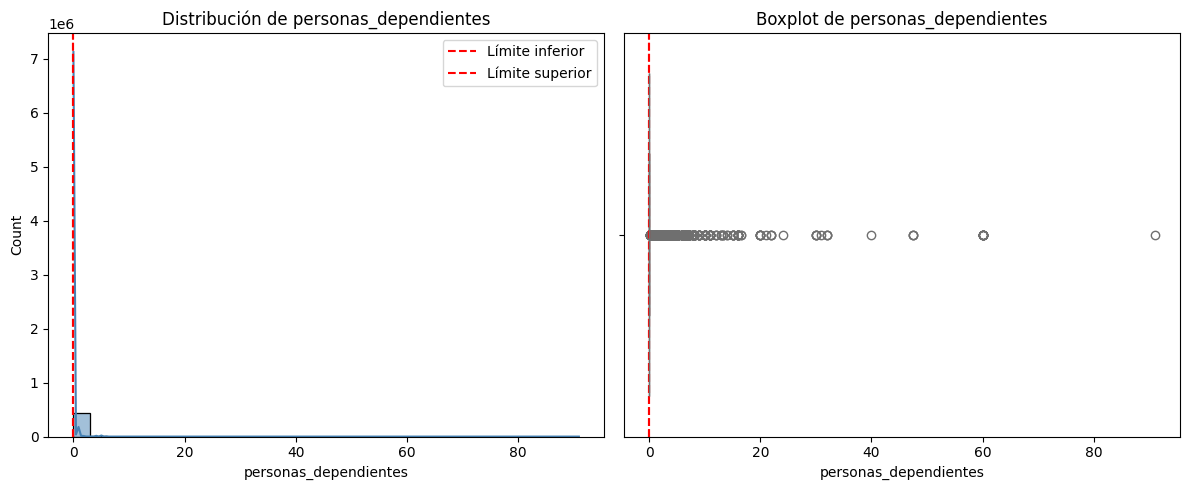


📌 Variable: 'total_ing'
----------------------------------------
Total de datos: 456290
Outliers detectados: 48718
Porcentaje de outliers: 10.68%
Rango IQR: Q1 = 1111479.00, Q3 = 4600000.00, IQR = 3488521.00
Valores extremos: min = 0.0, max = 5800000585200.0



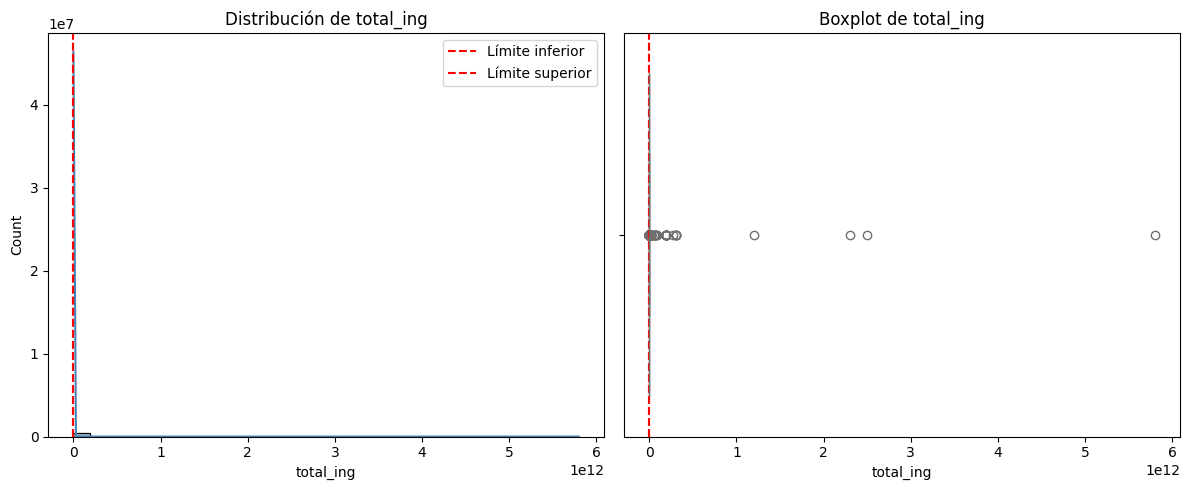


📌 Variable: 'tot_activos'
----------------------------------------
Total de datos: 456290
Outliers detectados: 45739
Porcentaje de outliers: 10.02%
Rango IQR: Q1 = 4485000.00, Q3 = 92243000.00, IQR = 87758000.00
Valores extremos: min = 0.0, max = 9000001950000.0



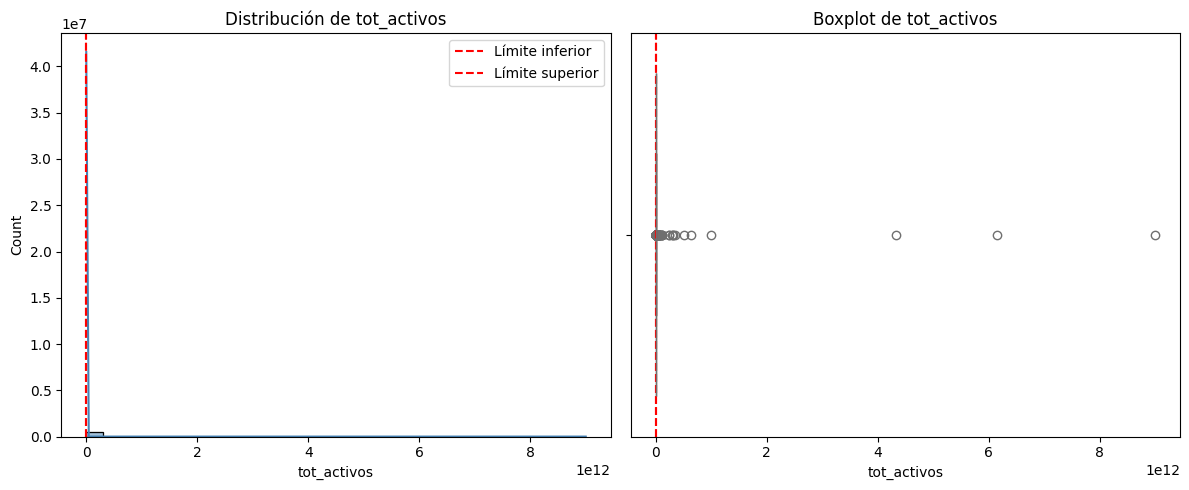


📌 Variable: 'tot_pasivos'
----------------------------------------
Total de datos: 456290
Outliers detectados: 113654
Porcentaje de outliers: 24.91%
Rango IQR: Q1 = 0.00, Q3 = 1000.00, IQR = 1000.00
Valores extremos: min = 0.0, max = 9800000000000.0



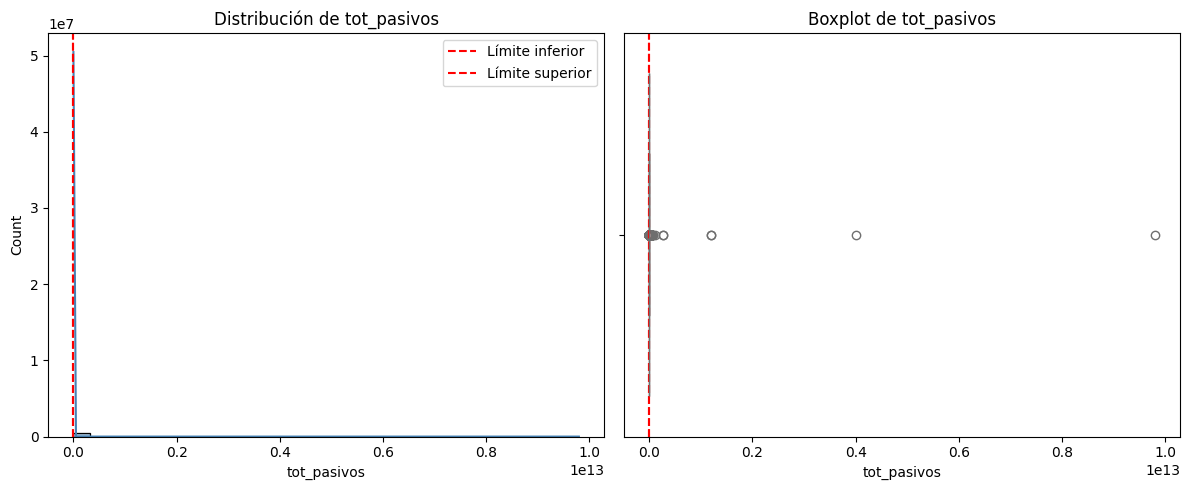


📌 Variable: 'f_vinc'
----------------------------------------
Total de datos: 456290
Outliers detectados: 28422
Porcentaje de outliers: 6.23%
Rango IQR: Q1 = 20110413.00, Q3 = 20190309.00, IQR = 79896.00
Valores extremos: min = 19111111.0, max = 20231228.0



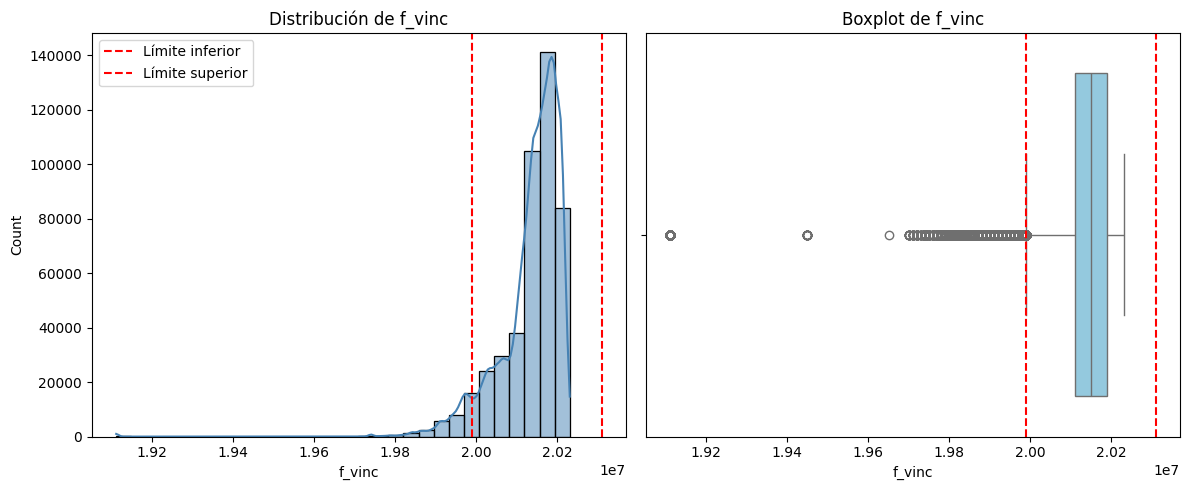


📌 Variable: 'f_ult_mantenimiento'
----------------------------------------
Total de datos: 456290
Outliers detectados: 15256
Porcentaje de outliers: 3.34%
Rango IQR: Q1 = 20230629.00, Q3 = 20231117.00, IQR = 488.00
Valores extremos: min = 20191012.0, max = 20231230.0



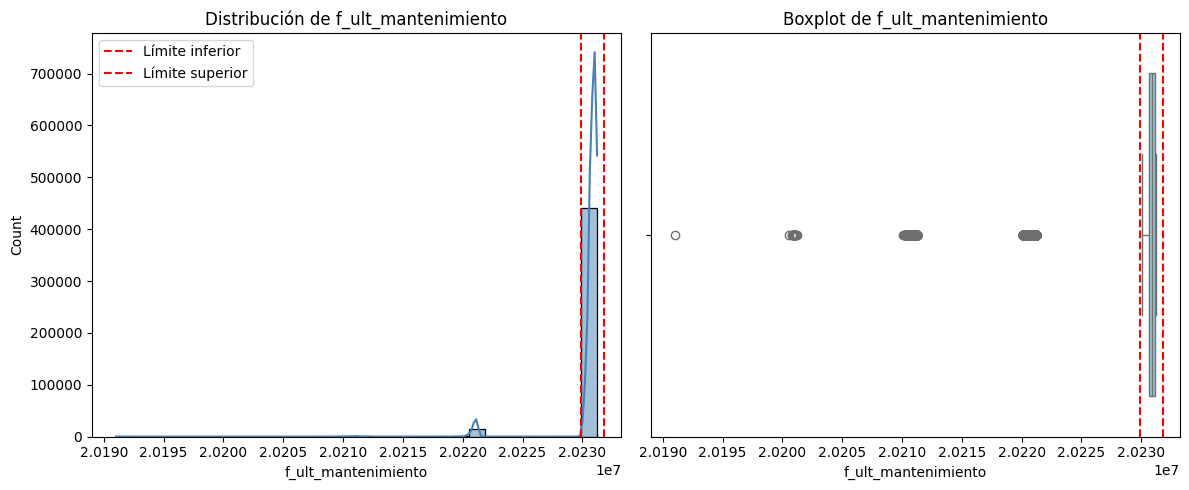


📌 Variable: 'egresos_mes'
----------------------------------------
Total de datos: 456290
Outliers detectados: 48676
Porcentaje de outliers: 10.67%
Rango IQR: Q1 = 100000.00, Q3 = 800000.00, IQR = 700000.00
Valores extremos: min = 0.0, max = 6000000000000.0



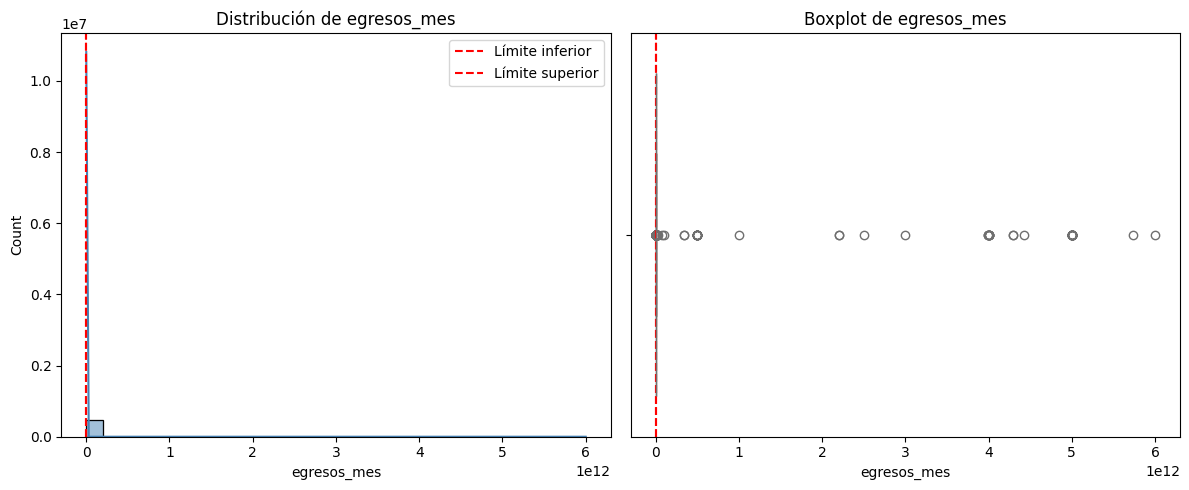


📌 Variable: 'tot_patrimonio'
----------------------------------------
Total de datos: 456290
Outliers detectados: 42728
Porcentaje de outliers: 9.36%
Rango IQR: Q1 = 4105266.25, Q3 = 85502250.00, IQR = 81396983.75
Valores extremos: min = 0.0, max = 9799655807000.0



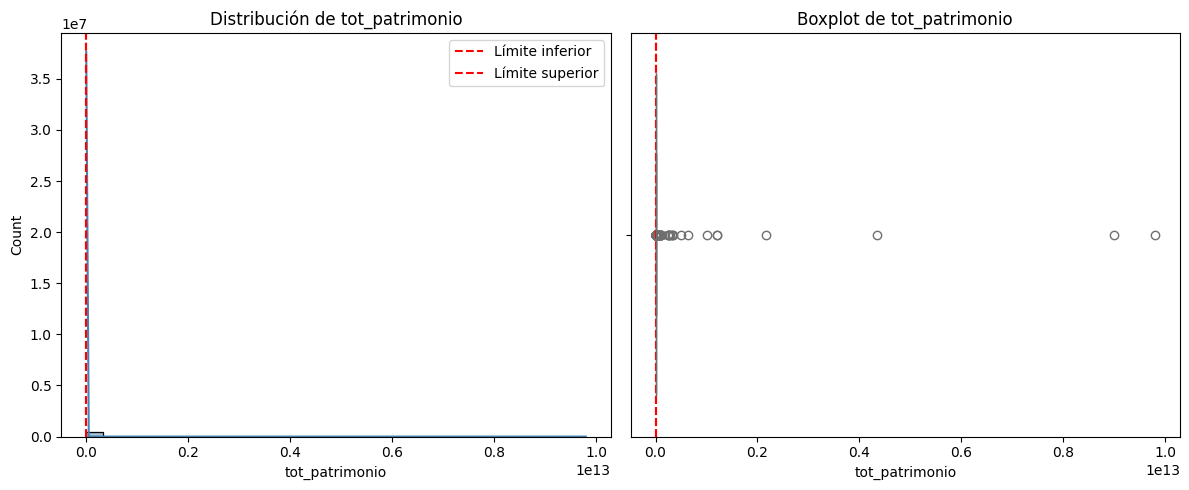


📌 Variable: 'pago_total'
----------------------------------------
Total de datos: 567936
Outliers detectados: 115527
Porcentaje de outliers: 20.34%
Rango IQR: Q1 = 0.00, Q3 = 86106.25, IQR = 86106.25
Valores extremos: min = 0.0, max = 2415000000.0



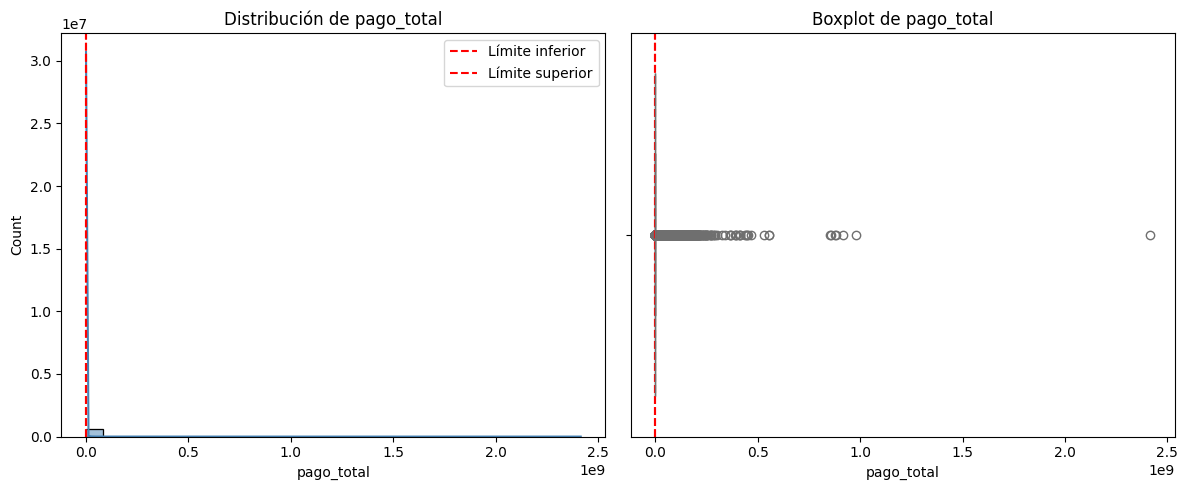


📌 Variable: 'porc_pago'
----------------------------------------
Total de datos: 560769
Outliers detectados: 116179
Porcentaje de outliers: 20.72%
Rango IQR: Q1 = 0.00, Q3 = 36.00, IQR = 36.00
Valores extremos: min = 0.0, max = 841732699.0



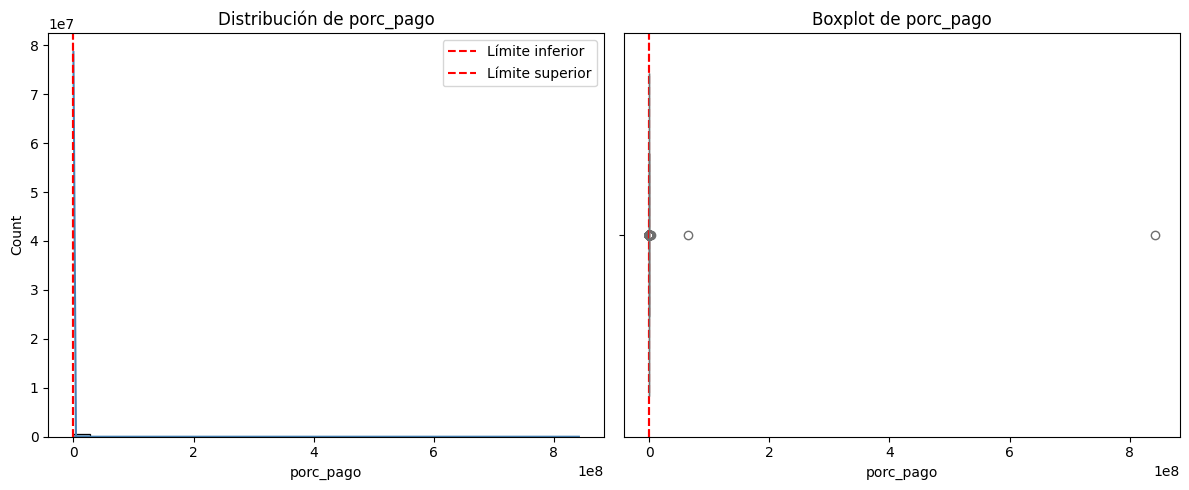


📌 Variable: 'prob_alrt_temprana'
----------------------------------------
Total de datos: 563890
Outliers detectados: 20109
Porcentaje de outliers: 3.57%
Rango IQR: Q1 = 0.54, Q3 = 0.69, IQR = 0.16
Valores extremos: min = 0.043319988494677, max = 0.9295174731503396



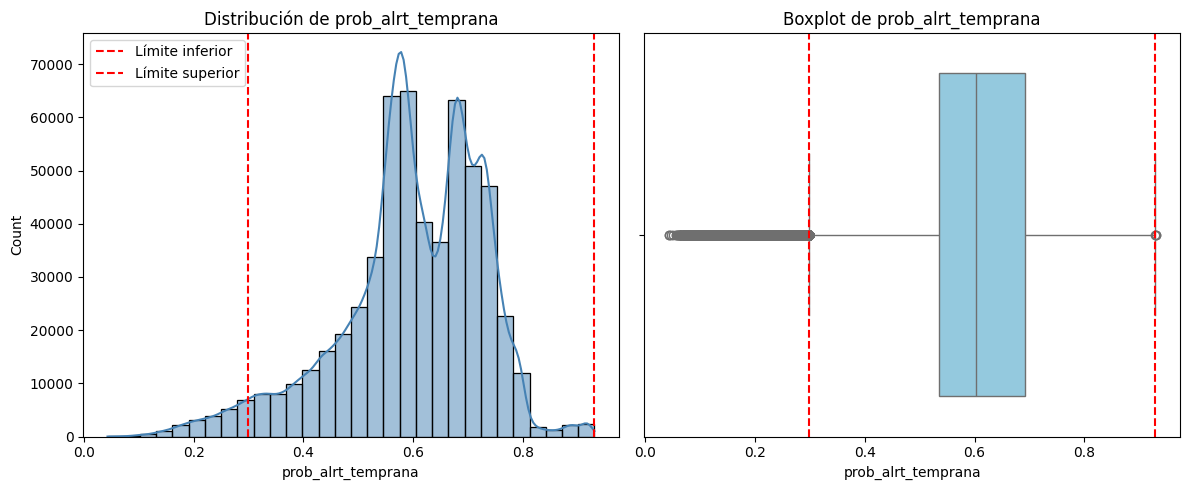


📌 Variable: 'prob_auto_cura'
----------------------------------------
Total de datos: 563890
Outliers detectados: 29452
Porcentaje de outliers: 5.22%
Rango IQR: Q1 = 0.18, Q3 = 0.36, IQR = 0.18
Valores extremos: min = 0.0472818806478672, max = 0.94241792517231



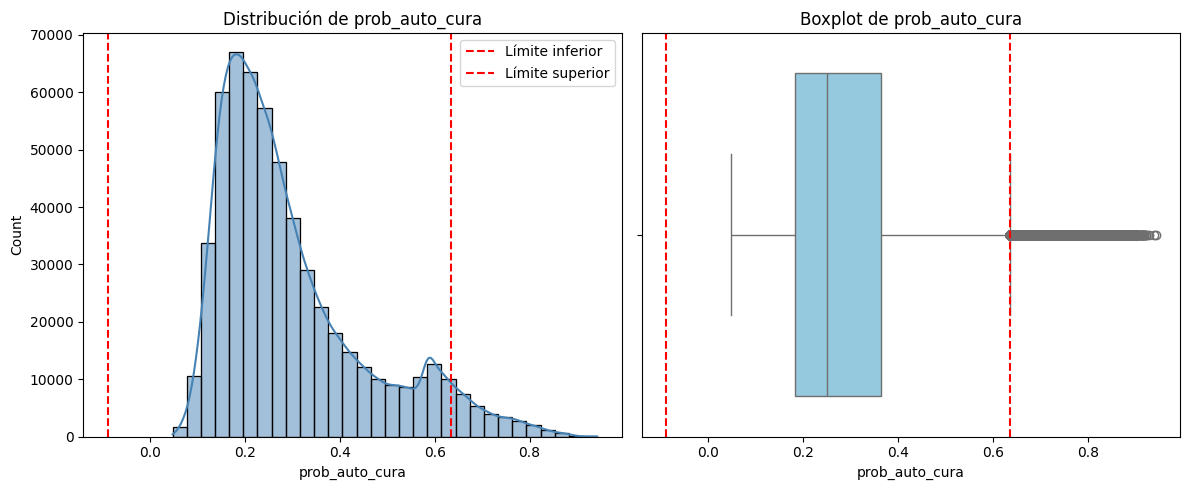


📈 Resumen de variables con outliers:


,Variable,Total valores,Outliers,% Outliers,Q1,Q3,IQR,Min,Max
0,tot_pasivos,456290,113654,24.91,0.000000e+00,1.000000e+03,1.000000e+03,0.000000e+00,9.800000e+12
1,pago_mes,568251,123463,21.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.450000e+08
2,porc_pago_cuota,568251,119372,21.01,0.000000e+00,3.234652e-01,3.234652e-01,0.000000e+00,1.000000e+00
3,porc_pago,560769,116179,20.72,0.000000e+00,3.600000e+01,3.600000e+01,0.000000e+00,8.417327e+08
4,pago_cuota,568248,115618,20.35,0.000000e+00,8.587682e+04,8.587682e+04,0.000000e+00,2.415000e+09
5,pago_total,567936,115527,20.34,0.000000e+00,8.610625e+04,8.610625e+04,0.000000e+00,2.415000e+09
6,porc_pago_mes,260137,45261,17.40,0.000000e+00,2.353440e-01,2.353440e-01,0.000000e+00,1.000000e+00
7,personas_dependientes,444502,62914,14.15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.100000e+01
8,num_hijos,444503,56876,12.80,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.600000e+01
9,saldo_capital,568251,65647,11.55,1.415149e+06,9.890030e+06,8.474881e+06,0.000000e+00,1.552838e+09


In [27]:
detect_outliers(df_trtest_mcd_cph_ph, umbral_porcentaje=1.0)

### Tratamiento

#### 🟥 | Outliers > 20%

Estas variables tienen una gran proporción de valores fuera del rango intercuartílico. Esto puede indicar que la distribución es fuertemente asimétrica o tiene muchos ceros (por ejemplo, pagos, valores monetarios, etc.)



In [28]:
df_test = df_trtest_mcd_cph_ph.copy()

In [29]:
outliers_20 = [
    'tot_pasivos', 
    'pago_mes',
    'porc_pago_cuota',
    'porc_pago',  
    'pago_cuota', 
    'pago_total'
]

for col in outliers_20:
    col_zeros_ratio = (df_test[col] == 0).mean()

    if col_zeros_ratio > 0.5:
        print(f"Columna '{col}' tiene más del 50% de valores cero → binarizando (0/1)")
        df_test[col] = np.where(df_test[col] > 0, 1, 0)

    elif (df_test[col] >= 0).all():
        print(f"Columna '{col}' no tiene negativos → aplicando log1p")
        df_test[col] = np.log1p(df_test[col])

    else:
        print(f"Columna '{col}' tiene valores negativos → winsorizando (1% y 99%)")
        q_low = df_test[col].quantile(0.01)
        q_high = df_test[col].quantile(0.99)
        df_test[col] = np.clip(df_test[col], q_low, q_high)


Columna 'tot_pasivos' tiene más del 50% de valores cero → binarizando (0/1)
Columna 'pago_mes' tiene más del 50% de valores cero → binarizando (0/1)
Columna 'porc_pago_cuota' tiene más del 50% de valores cero → binarizando (0/1)
Columna 'porc_pago' tiene más del 50% de valores cero → binarizando (0/1)
Columna 'pago_cuota' tiene más del 50% de valores cero → binarizando (0/1)
Columna 'pago_total' tiene más del 50% de valores cero → binarizando (0/1)


#### 🟧 | Outliers 15%-20%


Estas variables monetarias pueden estar escaladas en órdenes de magnitud muy distintos. Estas son variables discretas (enteras), con valores que probablemente tienen moda en 0.

In [ ]:
col = 'porc_pago_mes'
q_low = df_test[col].quantile(0.01)
q_high = df_test[col].quantile(0.99)
df_test[col] = np.clip(df_test[col], q_low, q_high)

col = 'personas_dependientes'
print(f'El valor máximo de {col} es: {df_test[col].max()}')
print(f'Se estableciendo un límite máximo para {col} de 6')
df_test[col] = np.where(df_test[col]> 6, 6, df_test[col])

#### 🟨 | Outliers 10%-15%


Estas son variables discretas (enteras), con valores que probablemente tienen moda en 0. Estas variables monetarias pueden estar escaladas en órdenes de magnitud muy distintos. 

In [ ]:
col = 'num_hijos'
print(f'El valor máximo de {col} es: {df_test[col].max()}')
print(f'Se estableciendo un límite máximo para {col} de 6')
df_test[col] = np.where(df_test[col]> 6, 6, df_test[col])

outliers_10_15 = [
    'saldo_capital',
    'vlr_obligacion',
    'total_ing',
    'egresos_mes', 
    'tot_activos'
    ]

for col in outliers_10_15:
    if (df_test[col] >= 0).all():
        print(f"Columna '{col}' no tiene negativos → aplicando log1p")
        df_test[col] = np.log1p(df_test[col])

    else:
        print(f"Columna '{col}' tiene valores negativos → winsorizando (1% y 99%)")
        q_low = df_test[col].quantile(0.01)
        q_high = df_test[col].quantile(0.99)
        df_test[col] = np.clip(df_test[col], q_low, q_high)

#### 🟩 | Outliers 5%-10%


Estas variables monetarias pueden estar escaladas en órdenes de magnitud muy distintos. 

In [ ]:
outliers_10_15 = [
    'vlr_vencido', 
    'valor_cuota_mes', 
    'tot_patrimonio',
    'promesas_cumplidas',
    'cant_acuerdo',
    'endeudamiento'
    ]

for col in outliers_10_15:
    if (df_test[col] >= 0).all():
        print(f"Columna '{col}' no tiene negativos → aplicando log1p")
        df_test[col] = np.log1p(df_test[col])

    else:
        print(f"Columna '{col}' tiene valores negativos → winsorizando (1% y 99%)")
        q_low = df_test[col].quantile(0.01)
        q_high = df_test[col].quantile(0.99)
        df_test[col] = np.clip(df_test[col], q_low, q_high)
    
print("Columna 'prob_auto_cura' → corrigiendo valores fuera de [0,1]")
df_test['prob_auto_cura'] = np.clip(df_test['prob_auto_cura'], 0, 1)

#### 🟦 | Outliers < 5%


Estas variables monetarias pueden estar escaladas en órdenes de magnitud muy distintos. 

In [ ]:
if (df_test['cant_gestiones'] == 0).mean() > 0.5:
    print(f"Columna 'cant_gestiones' tiene más del 50% de valores cero → binarizando (0/1)")
    df_test['cant_gestiones'] = np.where(df_test['cant_gestiones'] > 0, 1, 0)
else:
    print(f"Columna 'cant_gestiones' no tiene más del 50% de valores cero → winsorizando (1% y 99%)")
    q_low = df_test['cant_gestiones'].quantile(0.01)
    q_high = df_test['cant_gestiones'].quantile(0.99)
    df_test['cant_gestiones'] = np.clip(df_test['cant_gestiones'], q_low, q_high)

print("Columna 'prob_alrt_temprana' → corrigiendo valores fuera de [0,1]")
df_test['prob_alrt_temprana'] = np.clip(df_test['prob_alrt_temprana'], 0, 1)

## 🫥 | Valores nulos

Los valores nulos son datos faltantes en un conjunto de datos y son importantes identificarlos porque pueden afectar la calidad del análisis, generar sesgos en los resultados y reducir la precisión de los modelos predictivos. Es importante conocer la correlación entre ellos y tratarlos porque pueden estar relacionados con patrones específicos en los datos, y su manejo adecuado garantiza la integridad del análisis y mejora la capacidad de los modelos para generalizar correctamente.

### Identificación

In [30]:
identify_null_values(df_test)

🔍 Resumen general de valores nulos:
Total de celdas del DataFrame: 52847343
Total de valores nulos: 7003526
Porcentaje de valores nulos sobre el total: 13.25%
Número de columnas con al menos un valor nulo: 51

📊 Detalle por columna:



,total_nulls,%_nulos,type
tipo_vivienda,407750,71.76,object
alternativa_aplicada_agr,362989,63.88,object
marca_agrupada_rgo,362988,63.88,object
nivel_academico,351126,61.79,object
nicho,350193,61.63,object
alter_posible3_2,342865,60.34,object
alter_posible2_2,334102,58.79,object
porc_pago_mes,308114,54.22,float64
fecha_pago_maxima,292833,51.53,float64
fecha_pago_minima,292833,51.53,float64


### Correlación

🔍 Matriz de correlación de valores nulos para: DataFrame

                          vlr_obligacion  alter_posible2_2  alter_posible3_2  \
vlr_obligacion                  1.000000          0.004642          0.000122   
alter_posible2_2                0.004642          1.000000          0.533794   
alter_posible3_2                0.000122          0.533794          1.000000   
cant_gestiones                  0.034519         -0.000661          0.005954   
rpc                            -0.000064         -0.000335          0.001521   
cant_acuerdo                    0.034419         -0.000471          0.006186   
valor_cuota_mes                 0.067076          0.000367          0.001863   
porc_pago_mes                  -0.030363          0.045411          0.042626   
alternativa_aplicada_agr        0.003166          0.119107          0.126589   
marca_agrupada_rgo              0.003166          0.119111          0.126586   
cod_tipo_doc                    0.005661         -0.000110    

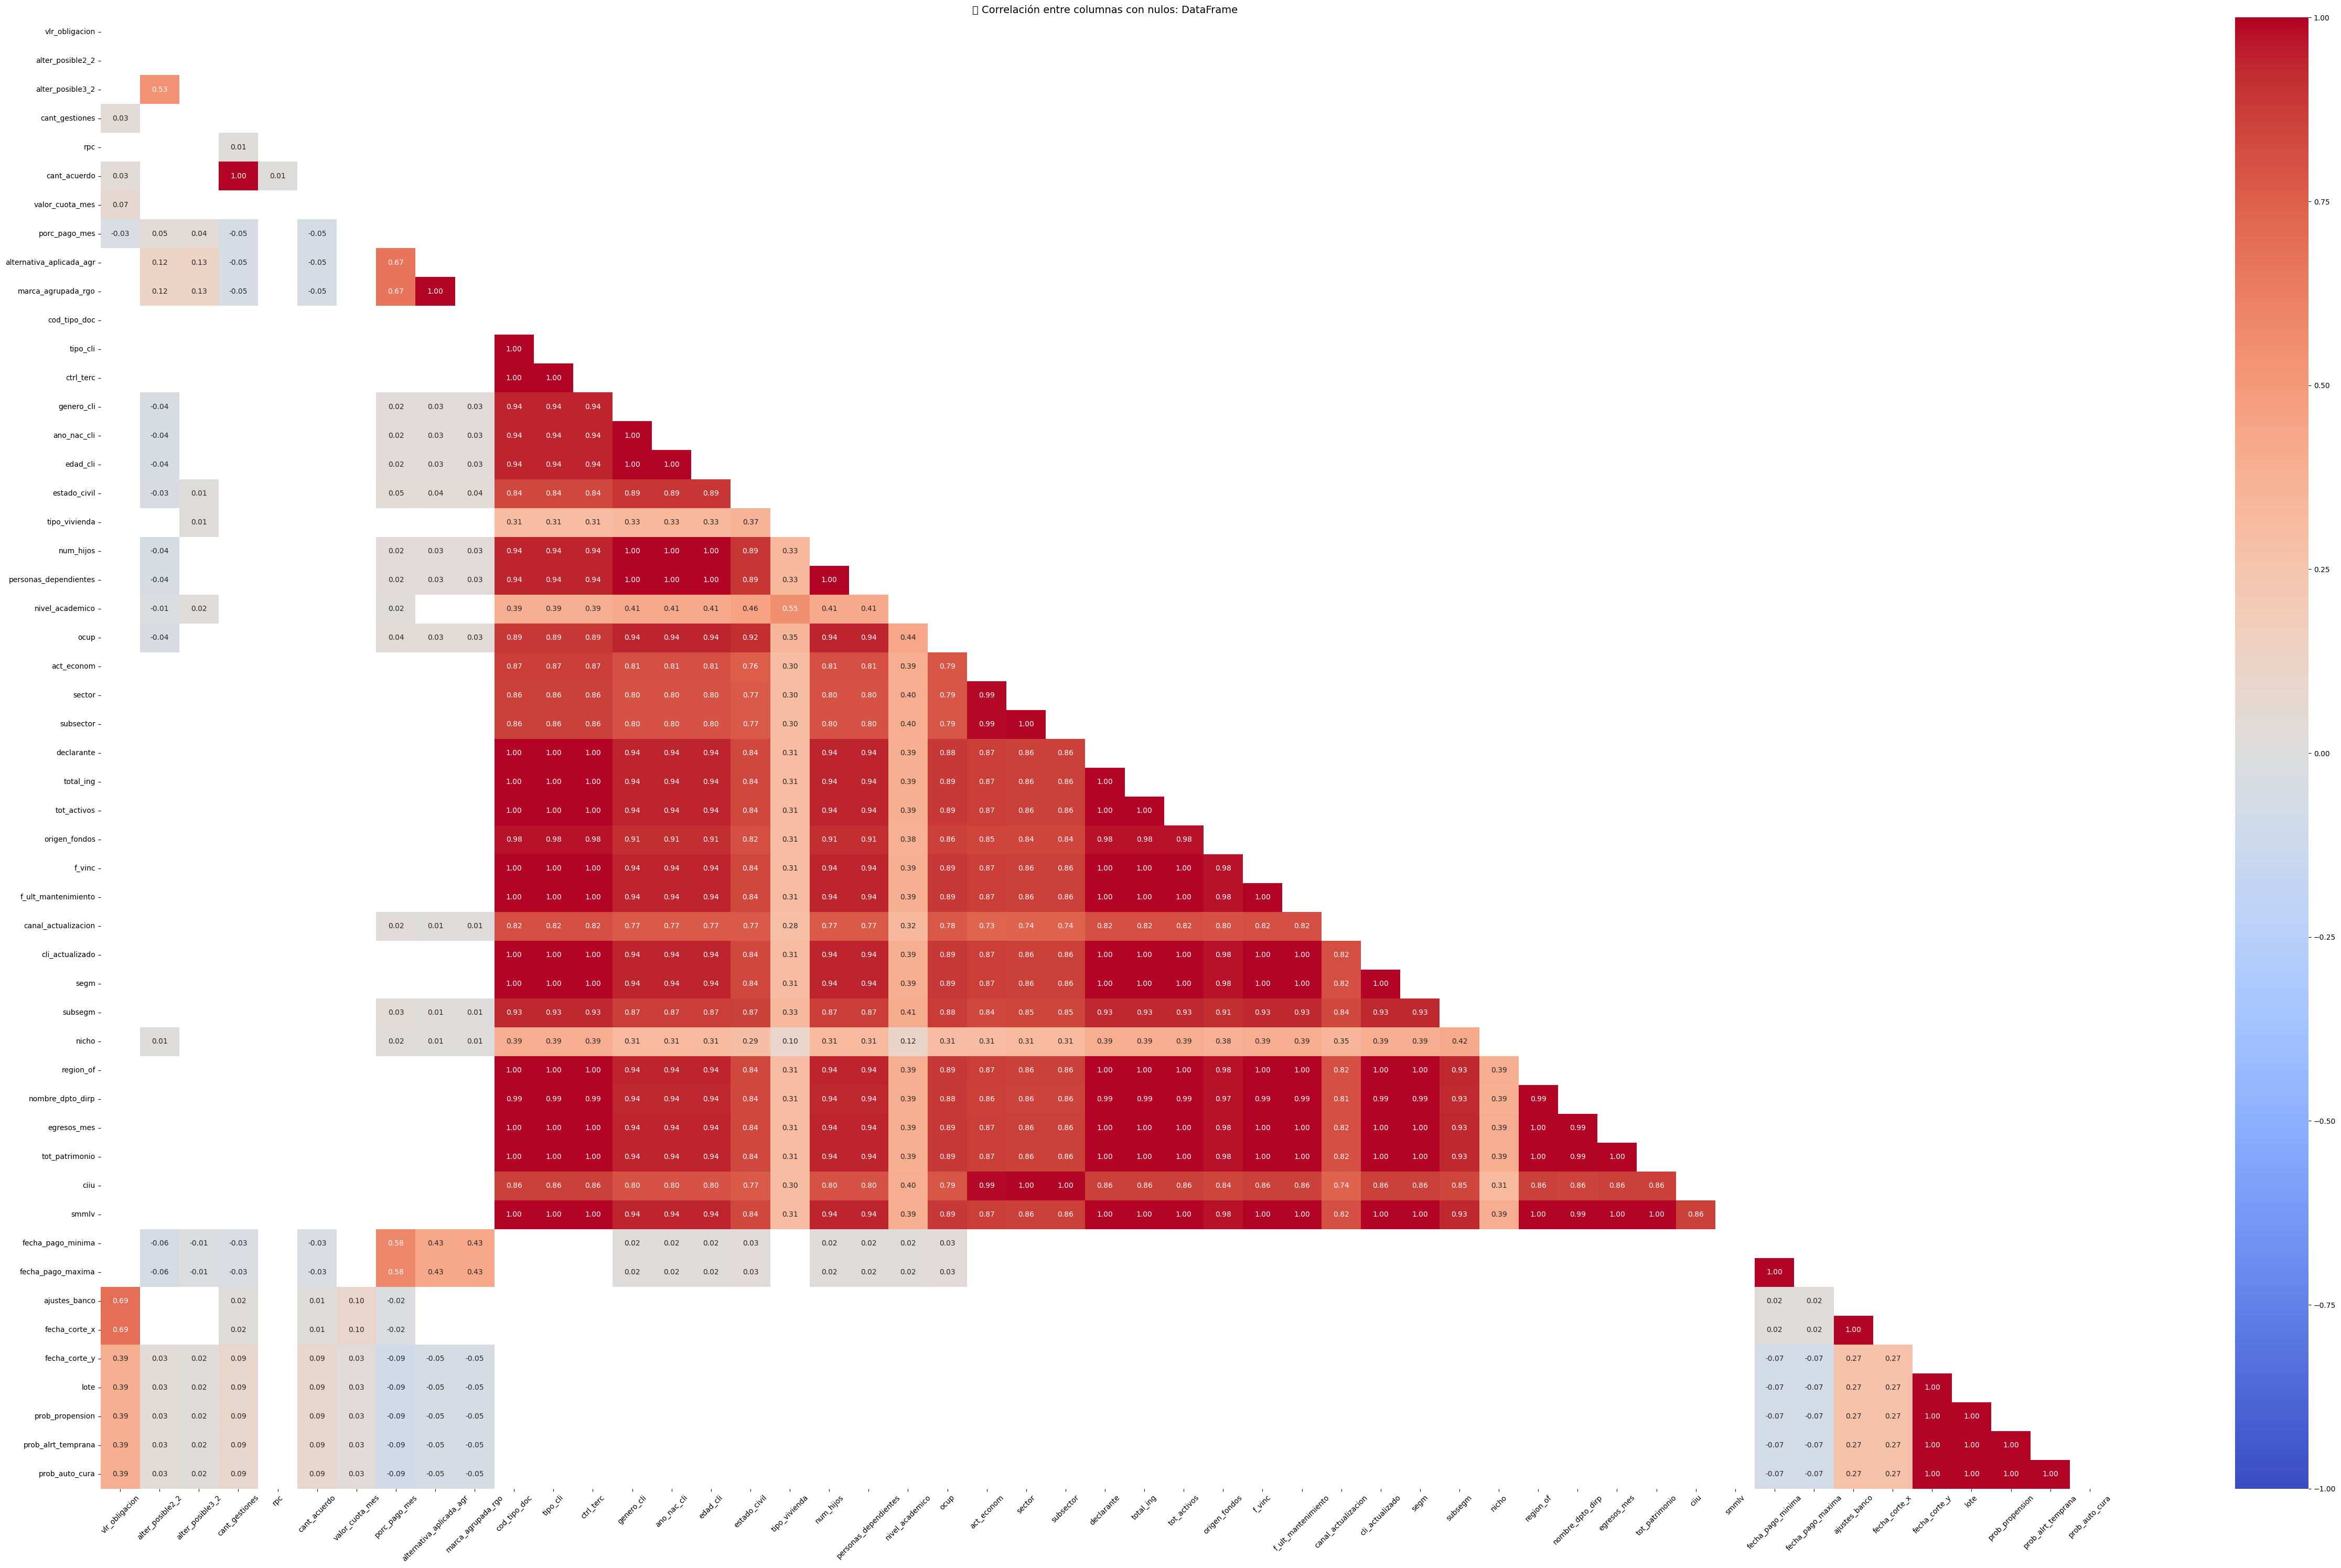

,vlr_obligacion,alter_posible2_2,alter_posible3_2,cant_gestiones,rpc,cant_acuerdo,valor_cuota_mes,porc_pago_mes,alternativa_aplicada_agr,marca_agrupada_rgo,...,smmlv,fecha_pago_minima,fecha_pago_maxima,ajustes_banco,fecha_corte_x,fecha_corte_y,lote,prob_propension,prob_alrt_temprana,prob_auto_cura
vlr_obligacion,1.000000,0.004642,0.000122,0.034519,-0.000064,0.034419,0.067076,-0.030363,0.003166,0.003166,...,0.005661,-0.002079,-0.002079,0.687518,0.687518,0.388927,0.388927,0.388927,0.388927,0.388927
alter_posible2_2,0.004642,1.000000,0.533794,-0.000661,-0.000335,-0.000471,0.000367,0.045411,0.119107,0.119111,...,-0.000110,-0.055784,-0.055784,0.001640,0.001640,0.034044,0.034044,0.034044,0.034044,0.034044
alter_posible3_2,0.000122,0.533794,1.000000,0.005954,0.001521,0.006186,0.001863,0.042626,0.126589,0.126586,...,-0.002965,-0.011534,-0.011534,-0.000621,-0.000621,0.015900,0.015900,0.015900,0.015900,0.015900
cant_gestiones,0.034519,-0.000661,0.005954,1.000000,0.010213,0.997750,-0.000422,-0.053024,-0.047723,-0.047722,...,-0.001485,-0.029996,-0.029996,0.015028,0.015028,0.093582,0.093582,0.093582,0.093582,0.093582
rpc,-0.000064,-0.000335,0.001521,0.010213,1.000000,0.010190,-0.000004,-0.000159,-0.002495,-0.002495,...,-0.000929,-0.000058,-0.000058,-0.000044,-0.000044,-0.000165,-0.000165,-0.000165,-0.000165,-0.000165
cant_acuerdo,0.034419,-0.000471,0.006186,0.997750,0.010190,1.000000,-0.000423,-0.053049,-0.047638,-0.047637,...,-0.001730,-0.030382,-0.030382,0.014977,0.014977,0.093315,0.093315,0.093315,0.093315,0.093315
valor_cuota_mes,0.067076,0.000367,0.001863,-0.000422,-0.000004,-0.000423,1.000000,0.002111,0.001728,0.001728,...,-0.001138,0.002228,0.002228,0.097563,0.097563,0.026127,0.026127,0.026127,0.026127,0.026127
porc_pago_mes,-0.030363,0.045411,0.042626,-0.053024,-0.000159,-0.053049,0.002111,1.000000,0.665092,0.665095,...,0.002683,0.582509,0.582509,-0.016777,-0.016777,-0.086844,-0.086844,-0.086844,-0.086844,-0.086844
alternativa_aplicada_agr,0.003166,0.119107,0.126589,-0.047723,-0.002495,-0.047638,0.001728,0.665092,1.000000,0.999996,...,0.001181,0.427905,0.427905,0.006659,0.006659,-0.048728,-0.048728,-0.048728,-0.048728,-0.048728
marca_agrupada_rgo,0.003166,0.119111,0.126586,-0.047722,-0.002495,-0.047637,0.001728,0.665095,0.999996,1.000000,...,0.001183,0.427908,0.427908,0.006659,0.006659,-0.048728,-0.048728,-0.048728,-0.048728,-0.048728


In [31]:
analyze_null_correlations(df_test)

### Tratamiento

#### 🔴 | Columnas con +50% de nulos (riesgo alto de ruido)

Eliminar columnas

In [32]:
df_test.drop(
    columns = [
        'fecha_corte_x',
        'fecha_corte_y',
        'tipo_vivienda',
        'nivel_academico',
        'nicho',
        'alternativa_aplicada_agr',
        'fecha_pago_maxima',
        'fecha_pago_minima'
        ],
    inplace = True
    )

Generar flag para las columnas y rellenar los campos nulos

In [33]:
df_test['flag_marca_agrupada_rgo'] = df_test['marca_agrupada_rgo'].notnull().astype(int)
df_test['marca_agrupada_rgo'] = df_test['marca_agrupada_rgo'].fillna('NO APLICA')

df_test['flag_alter_posible3_2'] = df_test['alter_posible3_2'].notnull().astype(int)
df_test['alter_posible3_2'] = df_test['alter_posible3_2'].fillna('NO APLICA')

df_test['flag_alter_posible2_2'] = df_test['alter_posible2_2'].notnull().astype(int)
df_test['alter_posible2_2'] = df_test['alter_posible2_2'].fillna('NO APLICA')

df_test['flag_porc_pago_mes'] = df_test['porc_pago_mes'].notnull().astype(int)
df_test['porc_pago_mes'] = df_test['porc_pago_mes'].fillna(df_test['porc_pago_mes'].median())

#### 🟠 | Columnas con 20–50% de nulos (mediana criticidad)

Eliminar columnas

In [34]:
df_test.drop(
    columns = [
        'edad_cli',
        'f_vinc',
        'f_ult_mantenimiento',
        'ciiu',
        'subsector',
        'act_econom',
        'subsegm',
        'personas_dependientes',
        ],
    inplace = True
    )

Generar flag para las columnas y rellenar los campos nulos

In [35]:
df_test['flag_ano_nac_cli'] = df_test['ano_nac_cli'].notnull().astype(int)
df_test['ano_nac_cli'] = df_test['ano_nac_cli'].fillna(df_test['ano_nac_cli'].median())

df_test['flag_genero_cli'] = df_test['ano_nac_cli'].notnull().astype(int)
df_test['genero_cli'] = df_test['genero_cli'].fillna('OTRO')

df_test['flag_estado_civil'] = df_test['estado_civil'].notnull().astype(int)
df_test['estado_civil'] = df_test['estado_civil'].fillna('SIN INFORMACION')

df_test['flag_canal_actualizacion'] = df_test['canal_actualizacion'].notnull().astype(int)
df_test['canal_actualizacion'] = df_test['canal_actualizacion'].fillna('SIN INFORMACION')

df_test['flag_sector'] = df_test['sector'].notnull().astype(int)
df_test['sector'] = df_test['sector'].fillna('SIN INFORMACION')

df_test['flag_ocup'] = df_test['ocup'].notnull().astype(int)
df_test['ocup'] = df_test['ocup'].fillna('SIN INFORMACION')

df_test['flag_num_hijos'] = df_test['num_hijos'].notnull().astype(int)
df_test['num_hijos'] = df_test['num_hijos'].fillna(df_test['num_hijos'].median())

df_test['flag_origen_fondos'] = df_test['origen_fondos'].notnull().astype(int)
df_test['origen_fondos'] = df_test['origen_fondos'].fillna('SIN INFORMACION')

df_test['egresos_mes'] = df_test['egresos_mes'].fillna(df_test['egresos_mes'].median())
df_test['tot_activos'] = df_test['tot_activos'].fillna(df_test['tot_activos'].median())
df_test['smmlv'] = df_test['smmlv'].fillna(df_test['smmlv'].median())

#### 🟡 | Columnas con 5–20% de nulos (baja criticidad, alta manejabilidad)

Eliminar columnas

In [36]:
df_test.drop(
    columns = [
        'region_of',
        'cod_tipo_doc'
    ],
    inplace = True
    )

Generar flag para las columnas y rellenar los campos nulos

In [37]:
df_test['flag_dpto_dirp'] = df_test['nombre_dpto_dirp'].notnull().astype(int)
df_test['nombre_dpto_dirp'] = df_test['nombre_dpto_dirp'].fillna('SIN INFORMACION')

df_test['flag_declarante'] = df_test['declarante'].notnull().astype(int)
df_test['declarante'] = df_test['declarante'].fillna('SIN INFORMACION')

df_test['flag_segm'] = df_test['segm'].notnull().astype(int)
df_test['segm'] = df_test['segm'].fillna('SIN INFORMACION')

df_test['flag_tipo_cli'] = df_test['tipo_cli'].notnull().astype(int)
df_test['tipo_cli'] = df_test['tipo_cli'].fillna('SIN INFORMACION')

df_test['flag_ctrl_terc'] = df_test['ctrl_terc'].notnull().astype(int)
df_test['ctrl_terc'] = df_test['ctrl_terc'].fillna('SIN INFORMACION')

df_test['flag_cli_actualizado'] = df_test['cli_actualizado'].notnull().astype(int)
df_test['cli_actualizado'] = df_test['cli_actualizado'].fillna('SIN INFORMACION')

df_test['flag_smmlv'] = df_test['smmlv'].notnull().astype(int)
df_test['smmlv'] = df_test['smmlv'].fillna(df_test['smmlv'].median())

df_test['flag_tot_activos'] = df_test['tot_activos'].notnull().astype(int)
df_test['tot_activos'] = df_test['tot_activos'].fillna(df_test['tot_activos'].median())

df_test['flag_tot_pasivos'] = df_test['tot_pasivos'].notnull().astype(int)
df_test['tot_pasivos'] = df_test['tot_pasivos'].fillna(df_test['tot_pasivos'].median())

df_test['flag_tot_patrimonio'] = df_test['tot_patrimonio'].notnull().astype(int)
df_test['tot_patrimonio'] = df_test['tot_patrimonio'].fillna(df_test['tot_patrimonio'].median())

df_test['flag_egresos_mes'] = df_test['egresos_mes'].notnull().astype(int)
df_test['egresos_mes'] = df_test['egresos_mes'].fillna(df_test['egresos_mes'].median())

df_test['flag_total_ing'] = df_test['total_ing'].notnull().astype(int)
df_test['total_ing'] = df_test['total_ing'].fillna(df_test['total_ing'].median())


#### 🟢 | Columnas con <5% de nulos (mínimo riesgo)


Generar flag para las columnas y rellenar los campos nulos

In [38]:
df_test['cant_acuerdo'] = df_test['cant_acuerdo'].fillna(df_test['cant_acuerdo'].median())
df_test['cant_gestiones'] = df_test['cant_gestiones'].fillna(df_test['cant_gestiones'].median())
df_test['porc_pago'] = df_test['porc_pago'].fillna(df_test['porc_pago'].median())
df_test['prob_propension'] = df_test['prob_propension'].fillna(df_test['prob_propension'].median())
df_test['lote'] = df_test['lote'].fillna(df_test['lote'].median())
df_test['prob_alrt_temprana'] = df_test['prob_alrt_temprana'].fillna(df_test['prob_alrt_temprana'].median())
df_test['prob_auto_cura'] = df_test['prob_auto_cura'].fillna(df_test['prob_auto_cura'].median())
df_test['vlr_obligacion'] = df_test['vlr_obligacion'].fillna(df_test['vlr_obligacion'].median())
df_test['pago_total'] = df_test['pago_total'].fillna(df_test['pago_total'].median())
df_test['pago_cuota'] = df_test['pago_cuota'].fillna(df_test['pago_cuota'].median())
df_test['valor_cuota_mes'] = df_test['valor_cuota_mes'].fillna(df_test['valor_cuota_mes'].median())
df_test['rpc'] = df_test['rpc'].fillna(df_test['rpc'].median())

df_test['ajustes_banco'] = df_test['ajustes_banco'].fillna('NO')

In [39]:
identify_null_values(df_test)

🔍 Resumen general de valores nulos:
Total de celdas del DataFrame: 56256849
Total de valores nulos: 0
Porcentaje de valores nulos sobre el total: 0.0%
Número de columnas con al menos un valor nulo: 0

📊 Detalle por columna:



,total_nulls,%_nulos,type


 ### 📁 | IDs a calificar

In [40]:
df_oot = df_base_pivot_oot.drop(
    columns = [
        'fecha_var_rpta_alt'
    ]
    )

## 🛫 | Exportar dataframes

In [41]:
df_test.to_csv('../data/processed/test.csv', index=False)
df_oot.to_csv('../data/interim/oot.csv', index=False)